# <font color = 'teal'>Project III: Data Visualization</font>


***

# <font color = 'teal'>Analyzed by Glory Edamkue</font>
***

### <font color = 'teal'>Import Libraries</font>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### <font color = 'teal'>Import Dataset</font>

***
I decided to work on the loan dataset from Prosper Loan. It contains the data of around 114,000 borrowers of the Prosper Loan company. The data set has data that could prove meaningful in understanding their loan setup and more about their borrowers.

In [4]:
# The Prosper Loan datset 

prosper = pd.read_csv('Prosper Loan Dataset.csv')
prosper.head().sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158


In [5]:
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### <font color = 'teal'>Preliminary Wrangling</font>

***
There will some minor cleaning of the dataset to make it more manageable for in order to get the best insights. 

#### <font color = 'teal'>I. Slicing the dataset</font>

In [6]:
# I have decided to work on a smaller dataset that will deal with variables I would like to explore

loan = prosper[['ListingKey', 'ListingNumber', 'Term', 'LoanStatus',
                'BorrowerAPR', 'ProsperScore',
                'BorrowerState', 'Occupation', 'EmploymentStatus', 'ListingCategory (numeric)',
                'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'OpenCreditLines',
                'CurrentDelinquencies', 'AmountDelinquent',
                'TradesNeverDelinquent (percentage)', 'DebtToIncomeRatio', 'IncomeVerifiable',
                'StatedMonthlyIncome', 'TotalProsperLoans', 'OnTimeProsperPayments',
                'LoanCurrentDaysDelinquent', 'LoanOriginalAmount']]
loan.head()

,ListingKey,ListingNumber,Term,LoanStatus,BorrowerAPR,ProsperScore,BorrowerState,Occupation,EmploymentStatus,ListingCategory (numeric),...,CurrentDelinquencies,AmountDelinquent,TradesNeverDelinquent (percentage),DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,OnTimeProsperPayments,LoanCurrentDaysDelinquent,LoanOriginalAmount
0,1021339766868145413AB3B,193129,36,Completed,0.16516,NaN,CO,Other,Self-employed,0,...,2.0,472.0,0.81,0.17,True,3083.333333,NaN,NaN,0,9425
1,10273602499503308B223C1,1209647,36,Current,0.12016,7.0,CO,Professional,Employed,2,...,0.0,0.0,1.00,0.18,True,6125.000000,NaN,NaN,0,10000
2,0EE9337825851032864889A,81716,36,Completed,0.28269,NaN,GA,Other,Not available,0,...,1.0,NaN,NaN,0.06,True,2083.333333,NaN,NaN,0,3001
3,0EF5356002482715299901A,658116,36,Current,0.12528,9.0,GA,Skilled Labor,Employed,16,...,4.0,10056.0,0.76,0.15,True,2875.000000,NaN,NaN,0,10000
4,0F023589499656230C5E3E2,909464,36,Current,0.24614,4.0,MN,Executive,Employed,2,...,0.0,0.0,0.95,0.26,True,9583.333333,1.0,11.0,0,15000


In [7]:
# A glance at the sliced data I will be working on

print(loan.shape)

print(loan.info())

(113937, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          113937 non-null  object 
 1   ListingNumber                       113937 non-null  int64  
 2   Term                                113937 non-null  int64  
 3   LoanStatus                          113937 non-null  object 
 4   BorrowerAPR                         113912 non-null  float64
 5   ProsperScore                        84853 non-null   float64
 6   BorrowerState                       108422 non-null  object 
 7   Occupation                          110349 non-null  object 
 8   EmploymentStatus                    111682 non-null  object 
 9   ListingCategory (numeric)           113937 non-null  int64  
 10  CreditScoreRangeLower               113346 non-null  float64
 11  CreditScoreRa

#### <font color = 'teal'>II. List of Loan Terms Used</font>

In [8]:
# A key of the terms used in the working dataset

loan_terms = pd.read_excel('Prosper Loan Data - Variable Definitions.xlsx')
loan_terms = loan_terms[loan_terms['Variable'].isin(loan)]

# I will reset the index because I know it has changed due to reducing the number of columns

loan_terms.reset_index(inplace = True, drop = True)

loan_terms

,Variable,Description
0,ListingKey,"Unique key for each listing, same value as the..."
1,ListingNumber,The number that uniquely identifies the listin...
2,Term,The length of the loan expressed in months.
3,LoanStatus,"The current status of the loan: Cancelled, Ch..."
4,BorrowerAPR,The Borrower's Annual Percentage Rate (APR) fo...
5,ProsperScore,A custom risk score built using historical Pro...
6,ListingCategory (numeric),The category of the listing that the borrower ...
7,BorrowerState,The two letter abbreviation of the state of th...
8,Occupation,The Occupation selected by the Borrower at the...
9,EmploymentStatus,The employment status of the borrower at the t...


#### <font color = 'teal'>III. Brief Programmatic Assessment</font>

In [9]:
loan.sample(10)

,ListingKey,ListingNumber,Term,LoanStatus,BorrowerAPR,ProsperScore,BorrowerState,Occupation,EmploymentStatus,ListingCategory (numeric),...,CurrentDelinquencies,AmountDelinquent,TradesNeverDelinquent (percentage),DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,OnTimeProsperPayments,LoanCurrentDaysDelinquent,LoanOriginalAmount
31639,5D72336556585314598DBB4,23811,36,Completed,0.09678,NaN,VA,Psychologist,Not available,0,...,0.0,NaN,NaN,0.20000,True,8726.083333,NaN,NaN,0,7999
75175,0C593595617720357596DAF,1009144,60,Current,0.18913,6.0,IL,Professional,Employed,1,...,0.0,0.0,0.93,0.20000,True,8750.000000,NaN,NaN,0,15000
70073,0894355203103931173490E,611541,36,Completed,0.35797,5.0,MI,Nurse (RN),Employed,1,...,0.0,0.0,0.95,0.22000,True,3750.000000,NaN,NaN,0,4000
45902,1879360349491218449C8FF,1216782,60,Current,0.16328,8.0,TX,NaN,Other,1,...,0.0,0.0,1.00,0.41000,True,5416.666667,NaN,NaN,0,15000
45327,E568353850107020153807A,555674,36,Chargedoff,0.24246,6.0,IL,Nurse (RN),Employed,3,...,0.0,0.0,0.96,0.20000,True,3750.000000,NaN,NaN,641,15000
102324,F88C3366073856790A0C57B,1351,36,Completed,0.16215,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,0.09854,True,2583.333333,NaN,NaN,0,7500
64200,E1A934248712546123A8B57,361545,36,Completed,0.37453,NaN,PA,Bus Driver,Full-time,6,...,2.0,924.0,0.25,0.11000,True,3333.333333,NaN,NaN,0,1500
66573,6FF23586561364692709E44,875666,36,Current,0.15324,5.0,IL,Professional,Employed,1,...,0.0,0.0,0.89,0.18000,True,18750.000000,NaN,NaN,0,21000
41325,94C335411572336325E66D5,568367,36,Completed,0.12782,9.0,MI,Professional,Employed,1,...,0.0,0.0,0.90,0.06000,True,5250.000000,NaN,NaN,0,6000
93173,4CC33557463945196216C06,631464,36,Current,0.12528,8.0,CA,Other,Employed,1,...,0.0,0.0,1.00,0.23000,True,6958.333333,1.0,14.0,0,13000


In [10]:
# Let us have a look if there are any duplicates

loan.duplicated().sum()

0

In [11]:
# Let us have a lookat the extent to which there are null entries, I noticed some in the sampling above

loan.isnull().sum()

ListingKey                                0
ListingNumber                             0
Term                                      0
LoanStatus                                0
BorrowerAPR                              25
ProsperScore                          29084
BorrowerState                          5515
Occupation                             3588
EmploymentStatus                       2255
ListingCategory (numeric)                 0
CreditScoreRangeLower                   591
CreditScoreRangeUpper                   591
OpenCreditLines                        7604
CurrentDelinquencies                    697
AmountDelinquent                       7622
TradesNeverDelinquent (percentage)     7544
DebtToIncomeRatio                      8554
IncomeVerifiable                          0
StatedMonthlyIncome                       0
TotalProsperLoans                     91852
OnTimeProsperPayments                 91852
LoanCurrentDaysDelinquent                 0
LoanOriginalAmount              

In [12]:
# A statistical look at the dataset

loan.describe()

,ListingNumber,Term,BorrowerAPR,ProsperScore,ListingCategory (numeric),CreditScoreRangeLower,CreditScoreRangeUpper,OpenCreditLines,CurrentDelinquencies,AmountDelinquent,TradesNeverDelinquent (percentage),DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,OnTimeProsperPayments,LoanCurrentDaysDelinquent,LoanOriginalAmount
count,1.139370e+05,113937.000000,113912.000000,84853.000000,113937.000000,113346.000000,113346.000000,106333.000000,113240.000000,106315.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,113937.000000,113937.00000
mean,6.278857e+05,40.830248,0.218828,5.950067,2.774209,685.567731,704.567731,9.260164,0.592052,984.507059,0.885897,0.275947,5.608026e+03,1.421100,22.271949,152.816539,8337.01385
std,3.280762e+05,10.436212,0.080364,2.376501,3.996797,66.458275,66.458275,5.022644,1.978707,7158.270157,0.148179,0.551759,7.478497e+03,0.764042,18.830425,466.320254,6245.80058
min,4.000000e+00,12.000000,0.006530,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1000.00000
25%,4.009190e+05,36.000000,0.156290,4.000000,1.000000,660.000000,679.000000,6.000000,0.000000,0.000000,0.820000,0.140000,3.200333e+03,1.000000,9.000000,0.000000,4000.00000
50%,6.005540e+05,36.000000,0.209760,6.000000,1.000000,680.000000,699.000000,9.000000,0.000000,0.000000,0.940000,0.220000,4.666667e+03,1.000000,15.000000,0.000000,6500.00000
75%,8.926340e+05,36.000000,0.283810,8.000000,3.000000,720.000000,739.000000,12.000000,0.000000,0.000000,1.000000,0.320000,6.825000e+03,2.000000,32.000000,0.000000,12000.00000
max,1.255725e+06,60.000000,0.512290,11.000000,20.000000,880.000000,899.000000,54.000000,83.000000,463881.000000,1.000000,10.010000,1.750003e+06,8.000000,141.000000,2704.000000,35000.00000


#### <font color = 'teal'>IV. Cleaning: Some Quality Issues</font>

##### <font color = 'teal'>a.Total Number of Loans Taken Dtype from Float to Integer</font>

In [13]:
# Convert the Total Number of Loans taken by a borrower from Prosper Loans into a whole number

loan['TotalProsperLoans'] =  pd.to_numeric(loan['TotalProsperLoans']).fillna(0).astype(np.int64)

In [14]:
loan['TotalProsperLoans'].astype(np.int64)

0         0
1         0
2         0
3         0
4         1
         ..
113932    0
113933    3
113934    0
113935    1
113936    0
Name: TotalProsperLoans, Length: 113937, dtype: int64

##### <font color = 'teal'>b. Conversion to Percenage Values in the Dataset</font>

In [15]:
#I will change the name of the `DebtToIncomeRatio` column to reflect percentage after I have converted it to percentages

loan['DebtToIncomeRatio'] = loan['DebtToIncomeRatio'] * 100
loan.rename(columns = {'DebtToIncomeRatio' : 'DebtToIncomeRatio (percentage)'}, inplace = True)

# I will change the values to percentages and also change the name
loan['BorrowerAPR'] = loan['BorrowerAPR'] * 100
loan['BorrowerAPR']
loan.rename(columns = {'BorrowerAPR' : 'BorrowerAPR (percentage)'}, inplace = True)

# Let's see how that is holding up

print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          113937 non-null  object 
 1   ListingNumber                       113937 non-null  int64  
 2   Term                                113937 non-null  int64  
 3   LoanStatus                          113937 non-null  object 
 4   BorrowerAPR (percentage)            113912 non-null  float64
 5   ProsperScore                        84853 non-null   float64
 6   BorrowerState                       108422 non-null  object 
 7   Occupation                          110349 non-null  object 
 8   EmploymentStatus                    111682 non-null  object 
 9   ListingCategory (numeric)           113937 non-null  int64  
 10  CreditScoreRangeLower               113346 non-null  float64
 11  CreditScoreRangeUpper     

##### <font color = 'teal'>c. Conversion of Current Delinquencies from Float to Integer</font>

In [16]:
loan['CurrentDelinquencies'] = pd.to_numeric(loan['CurrentDelinquencies']).fillna(0).astype(np.int64)
loan['CurrentDelinquencies'].astype(np.int64)

# Let's see if that held up
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          113937 non-null  object 
 1   ListingNumber                       113937 non-null  int64  
 2   Term                                113937 non-null  int64  
 3   LoanStatus                          113937 non-null  object 
 4   BorrowerAPR (percentage)            113912 non-null  float64
 5   ProsperScore                        84853 non-null   float64
 6   BorrowerState                       108422 non-null  object 
 7   Occupation                          110349 non-null  object 
 8   EmploymentStatus                    111682 non-null  object 
 9   ListingCategory (numeric)           113937 non-null  int64  
 10  CreditScoreRangeLower               113346 non-null  float64
 11  CreditScoreRangeUpper     

### <font color = 'teal'>What is the structure of your dataset?</font>

> There are 113937 entries in the dataset representing borrowers of the loan company, Prosper Loan. The sliced dataset I will be working with has variables such as Annual Percentage Rate (APR), Debt to Income ratio (DTI), Employment Status, Occupation, Amount Delinquent, Income Verifiable, Stated Monthly Income, to mention a few. Most variables are numeric in nature, thugh there are categoric varaibles with numeric ordering. I do not consider the null values that significant to impact any exploration I would like to make, seeing that all are less than 10% of the dataset.

### <font color = 'teal'>What is/are the main feature(s) of interest in your dataset?</font>

> My interest lies in the income, term, Annual Percentage Rate (APR) and/or Debt To Income (DTI) ratio of borrowers. I would like to explore these relationships at a higher level in my bivariate and multivariate explorations.

### <font color = 'teal'>What features in the dataset do you think will help support your investigation into your feature(s) of interest?</font>

> I feel all my interests are inter-related, but I do not know to what extent and if any other variables have an influence in it. For instance, I feel that the loan status could be affected by employment status, term, APR and the DTI of the borrower. And these variables could be in turn influenced by the state of the borrower due to things like income. I think that when the income is higher, that the APR reduces, and that the DTI is not influenced by any other variables save the delinquency of the borrower. Perhaps the employment status determines the DTI, and it is higher for unemployed people.I would like to see how true that is. I feel that those who take loans do not have high enough incomes, so I would like to know what the relationship between occupation and income is like.
>That means that the income and loan status will be explored.

### <font color = 'teal'>**Univariate Exploration**</font>

***

#### <font color = 'teal'>1. Employment Frequency</font>

##### What type of people are more likely to receive a loan from the loan company? Who are least likely to, and by how much percentage?
***

In [17]:
# def fun():
#     print('This sucks!')

In [18]:
# def student(firstname, lastname):
#     print(firstname, lastname)


In [19]:
# student('Patricia', 'Velveteen')

In [20]:
# def count_plot(data, x_var, palette, **order, title, x_label, y_label):
#     fig, ax = plt.subplots(figsize = (15, 12))
#     sns.countplot(data = data, x = x_var, palette = palette, **order = order)
#     plt.title(title)
#     plt.xlabel(x_label)
#     plt.ylabel(y_label)
#     plt.tick_params(bottom = False, left = False)
#     plt.grid(b = True, axis = 'x')
#     plt.xticks(rotation = 45)
    
#     ax.spines['top'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.spines['right'].set_visible(False)

In [21]:
# I would like to look at the employment statistics of the borrowers

loan.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

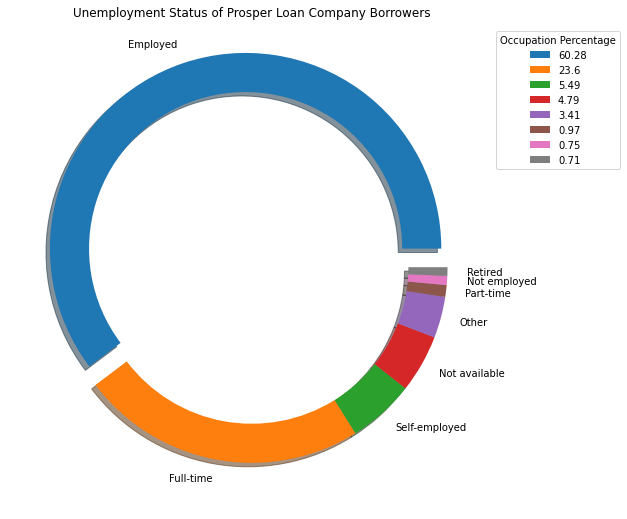

In [22]:
# Employment status of people who take out loans at Proper Loans

plt.figure(figsize = (15, 9))
loan.EmploymentStatus.value_counts(normalize = True).plot(kind = 'pie', explode = [.1, 0, 0, 0, 0, 0, 0, 0], shadow = True,
                                                          startangle = 360, counterclock = True,
                                                          labels = loan.EmploymentStatus.value_counts().index,
                                                          wedgeprops = {'width' : .2})
plt.title('Unemployment Status of Prosper Loan Company Borrowers')
plt.ylabel('')
plt.xlabel('')
plt.legend(labels = (loan.EmploymentStatus.value_counts(normalize = True)*100).round(2), loc = (1,.7),
           title = 'Occupation Percentage');

##### <font color = 'teal'>Observation:
    
> The most likely people to receive loans are employed, they make up around 60.28% of borrowers.

#### <font color = 'teal'>2. Occupation Frequency</font>

##### What type of occupations do borrowers belong to, and which occupation is most likely and least likely to receive a loan?

In [23]:
#  I would like to see the relative frequency of the occupations as percentages of the known occupations

loan['Occupation'].value_counts(normalize = True) * 100

Other                          25.933176
Professional                   12.349908
Computer Programmer             4.058034
Executive                       3.906696
Teacher                         3.406465
                                 ...    
Dentist                         0.061623
Student - College Freshman      0.037155
Student - Community College     0.025374
Judge                           0.019937
Student - Technical School      0.014499
Name: Occupation, Length: 67, dtype: float64

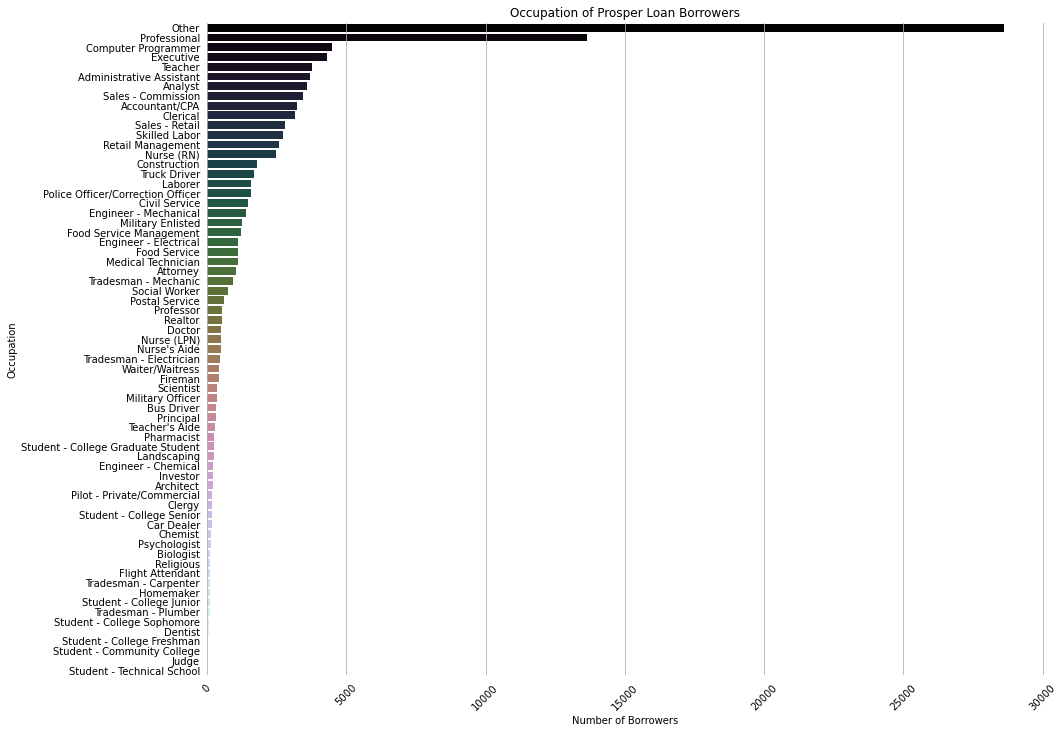

In [24]:
# A look at the occupation of the borrowers

fig, ax = plt.subplots(figsize = (15, 12))

orders = loan['Occupation'].value_counts().index

sns.countplot(data = loan, y = 'Occupation', palette = 'cubehelix', order = orders)
plt.title('Occupation of Prosper Loan Borrowers')
plt.xlabel('Number of Borrowers')
plt.ylabel('Occupation')
plt.tick_params(bottom = False, left = False)
plt.grid(b = True, axis = 'x')
plt.xticks(rotation = 45)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

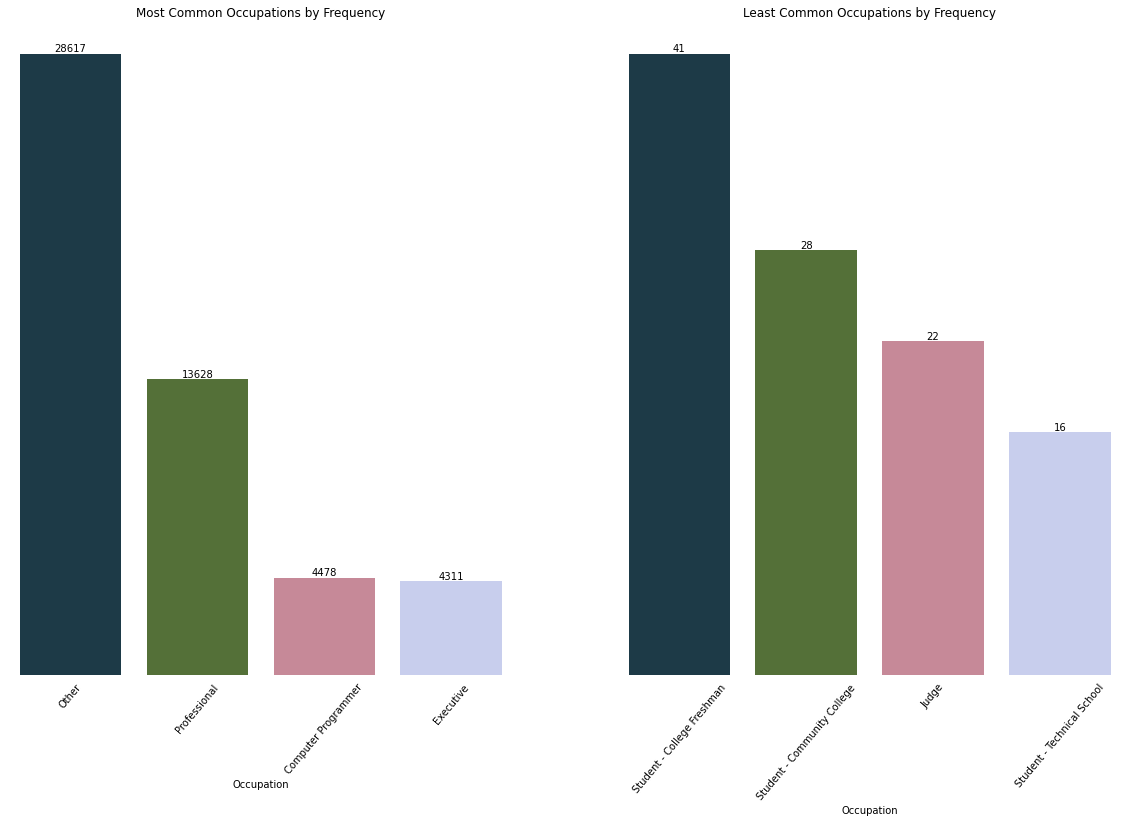

In [25]:
#  A closer look at the differencce between the two, take note of the values!

fig, ax = plt.subplots(figsize = (20, 12))

ax1 = plt.subplot(1, 2, 1)

sns.countplot(data = loan, x = 'Occupation', palette = 'cubehelix', order = loan['Occupation'].value_counts().index[:4])
plt.xticks(rotation = 50)
plt.title('Most Common Occupations by Frequency')
plt.xlabel('Occupation')
plt.ylabel('')
plt.grid(b = 'visible', axis = 'y')
plt.tick_params(bottom = False, left = False)
plt.yticks([])

ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

for containers in ax1.containers:
    ax1.bar_label(containers)

ax2 = plt.subplot(1, 2, 2)
sns.countplot(data = loan, x = 'Occupation', palette = 'cubehelix', order = loan['Occupation'].value_counts().index[-4:])
plt.xticks(rotation = 50)
plt.title('Least Common Occupations by Frequency')
plt.xlabel('Occupation')
plt.ylabel('')
plt.grid(b = 'visible', axis = 'y')
plt.tick_params(bottom = False, left = False)
plt.yticks([])

ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

for containers in ax2.containers:
    ax2.bar_label(containers)

##### <font color = 'teal'>Observation:

> The large majority of loans taken by a known occupation are the loans taken and given to professionals, followed by computer programmers and executives. They make up 12.35%, 4.06% and 3.91% of the borrowers respectively.Loans taken by people in other  occupations account for 25.93% of the borrowers.
>
> Meanwhile judges and students in technical schools were the fewest recipients of loans with only 0.02% of recipients being judges and 0.01% being students at techhnical schools. Maybe Prosper Loans intends for everyone but gavel wielders and unpredictable kids taking out loans. I will find  out why.

#### <font color = 'teal'>3. Loan Status Frequency</font>

##### What is the status of loans given out? How do borrowers behave after being given loans? Does the loan term have anything to do with the status?

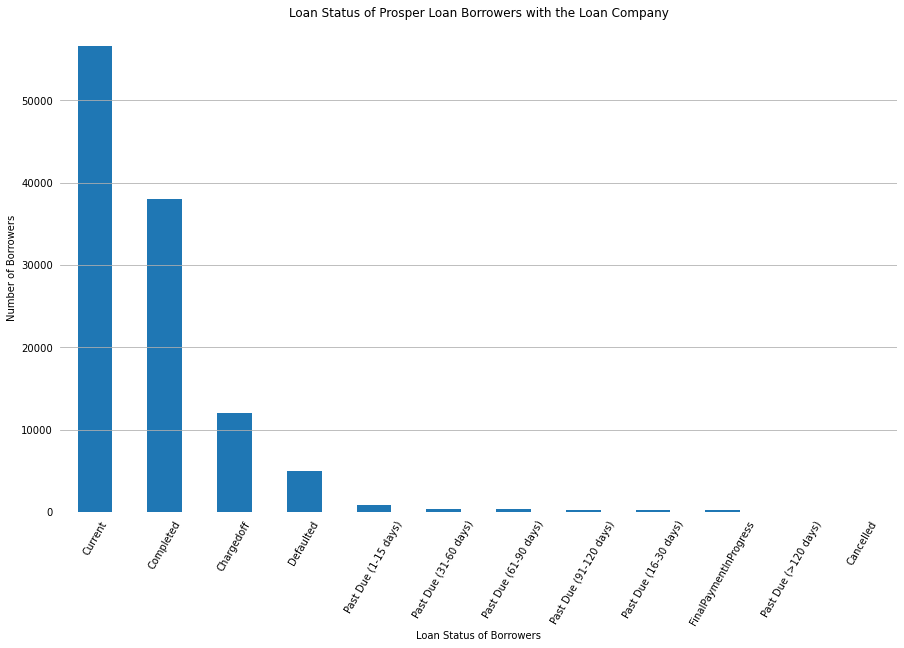

In [26]:
# What makes up the number of loans given out, let us have a look

fig, ax = plt.subplots(figsize = (15, 9))

loan['LoanStatus'].value_counts().plot(
    kind = 'bar')
plt.title('Loan Status of Prosper Loan Borrowers with the Loan Company')
plt.ylabel('Number of Borrowers')
plt.xlabel('Loan Status of Borrowers')
plt.xticks(rotation = 60)
plt.tick_params(bottom = False, left = False)
plt.grid(b = 'visible', axis = 'y');

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

In [27]:
# Just how many people make up the frequencies, and what is their relative frequency

print(loan['LoanStatus'].value_counts())
print('\n', (loan['LoanStatus'].value_counts(normalize = True)*100).round(2)) #This is a percentage value of the whole

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

 Current                   49.66
Completed                 33.42
Chargedoff                10.53
Defaulted                  4.40
Past Due (1-15 days)       0.71
Past Due (31-60 days)      0.32
Past Due (61-90 days)      0.27
Past Due (91-120 days)     0.27
Past Due (16-30 days)      0.23
FinalPaymentInProgress     0.18
Past Due (>120 days)       0.01
Cancelled                  0.00
Name: LoanStatus, dtype: float64


##### <font color = 'teal'>Observation(s):

> About a third of the borrowers have repaid their loans. Repaid loans stand at about 33.42% of the total loans given out.
> There are more loans in progress and amount to 49.66% of all loans given out. The DTI will be higher in this category of borrowers, beccause they are ging to be actively servicing loans.

#### <font color = 'teal'>4. Frequency of Listing Categories</font>

In [28]:
# I have decided to make this column categorical so that it is easier to understand what is going on whenever I need to 
# investigate it. I will rename it too, since it is now non-numeric.

listing_category = {0 : 'Not Available', 1 : 'Debt Consolidation',
                    2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan',
                    5 : 'Student Use', 6 : 'Auto', 7 : 'Other',
                    8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure',
                    11 : 'Engagement Ring', 12 : 'Green Loans',
                    13 : 'Household Expenses', 14 : 'Large Purchases',
                    15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV',
                    18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

loan = loan.replace({'ListingCategory (numeric)' : listing_category})
loan.rename(columns = {'ListingCategory (numeric)' : 'ListingCategory'}, inplace = True)
print(loan['ListingCategory'])

0              Not Available
1           Home Improvement
2              Not Available
3                 Motorcycle
4           Home Improvement
                 ...        
113932    Debt Consolidation
113933                 Other
113934    Debt Consolidation
113935      Home Improvement
113936    Debt Consolidation
Name: ListingCategory, Length: 113937, dtype: object


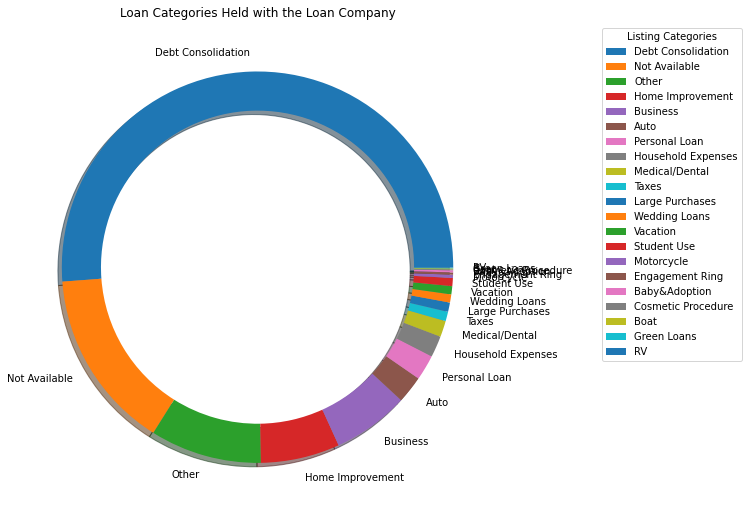

In [29]:
# Now I am going to have a perfunctory look at it and see what the data on listings look like

plt.figure(figsize = (15, 9))

loan['ListingCategory'].value_counts(normalize = True).plot(
    kind = 'pie', wedgeprops ={'width' : .2}, startangle = 360, counterclock = True,
    shadow = True, labels = loan['ListingCategory'].value_counts().index)
plt.title('Loan Categories Held with the Loan Company')
plt.ylabel('')
plt.xlabel('')
plt.legend(title = 'Listing Categories', bbox_to_anchor = (1.5,1));

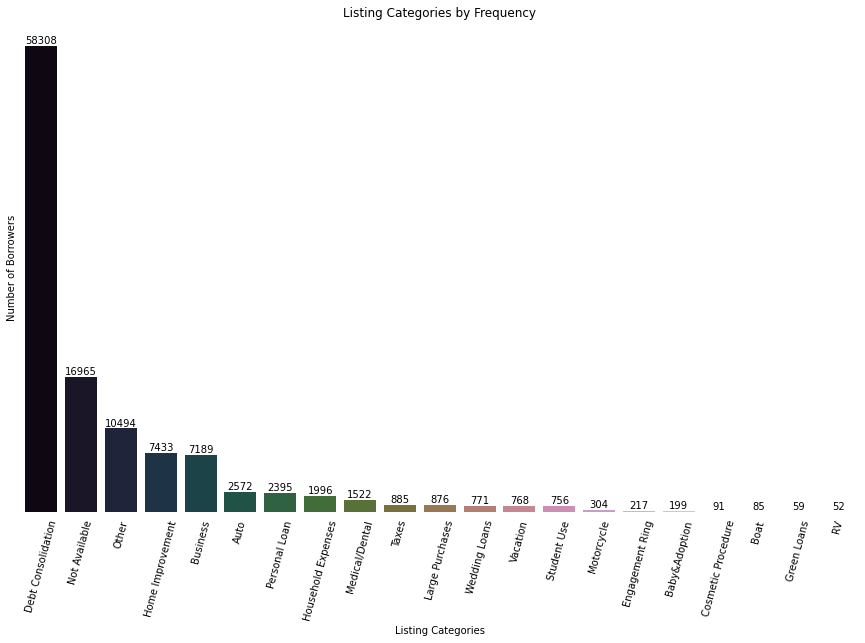

In [30]:
# A better plot to highlight the frequencies of listing categories would be something ordered in which all labels can show

fig, ax = plt.subplots(figsize = (15, 9))

orders = loan['ListingCategory'].value_counts().index

sns.countplot(data = loan, x = 'ListingCategory',
              order = orders, palette = 'cubehelix')
plt.title('Listing Categories by Frequency')
plt.xlabel('Listing Categories')
plt.ylabel('Number of Borrowers')
plt.yticks([])
plt.tick_params(bottom = False, left = False)
plt.grid(b = 'visible', axis = 'y')
plt.xticks(rotation = 75);

for containers in ax.containers:
    ax.bar_label(containers)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)


In [31]:
# Percentage of Borrowers by Listing Categories

(loan['ListingCategory'].value_counts(normalize = True) * 100).round(2)

Debt Consolidation    51.18
Not Available         14.89
Other                  9.21
Home Improvement       6.52
Business               6.31
Auto                   2.26
Personal Loan          2.10
Household Expenses     1.75
Medical/Dental         1.34
Taxes                  0.78
Large Purchases        0.77
Wedding Loans          0.68
Vacation               0.67
Student Use            0.66
Motorcycle             0.27
Engagement Ring        0.19
Baby&Adoption          0.17
Cosmetic Procedure     0.08
Boat                   0.07
Green Loans            0.05
RV                     0.05
Name: ListingCategory, dtype: float64

##### <font color = 'teal'>Observation(s):

> The most common reason people approached the company for loans was for debt consolidation. 51.18% of borrowers took out a loan for that reason. Many people need a loan to pay off other loans. The pattern of borrowing could indicate a high DTI in the dataset.
>    
> It is interesting that the next large category of people who were given loans had no available reason for taking one, with 14.89% having unavailable reasons and a further 9.21% having some other reason that is not made clear in the listings.

#### <font color = 'teal'>5. Frequency of Borrower States</font>

##### Which state has the most borrowers?

In [32]:
# I would like to know more about the way the states are written and how many there are

print(loan['BorrowerState'].nunique(), '\n')
print('The borrower states:', '\n', loan['BorrowerState'].unique())

51 

The borrower states: 
 ['CO' 'GA' 'MN' 'NM' 'KS' 'CA' 'IL' 'MD' nan 'AL' 'AZ' 'VA' 'FL' 'PA' 'OR'
 'MI' 'NY' 'LA' 'WI' 'OH' 'NC' 'WA' 'NV' 'NJ' 'TX' 'AR' 'SC' 'DE' 'MO'
 'NE' 'UT' 'DC' 'MA' 'CT' 'IN' 'KY' 'OK' 'MS' 'WV' 'RI' 'TN' 'ID' 'MT'
 'HI' 'NH' 'VT' 'WY' 'ME' 'AK' 'IA' 'SD' 'ND']


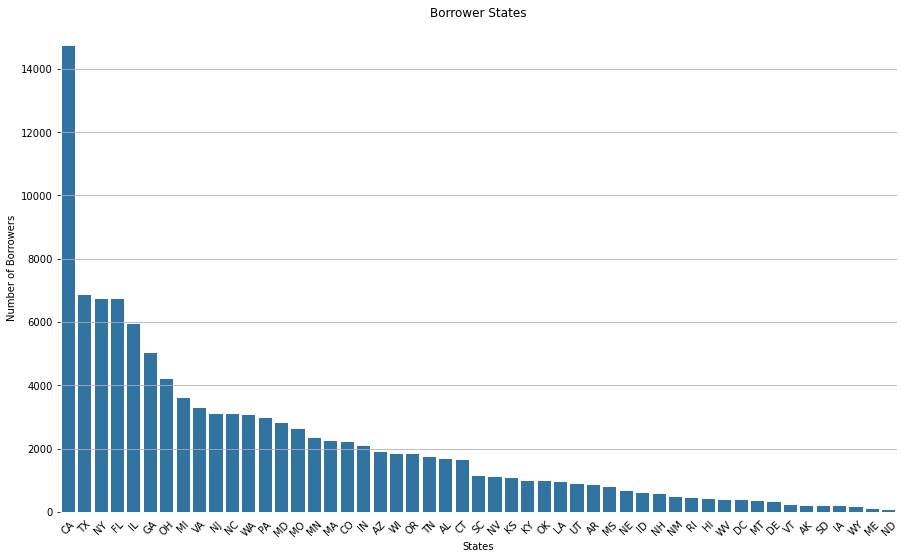

In [33]:
# Let us see the state with the most borrowers

fig, ax = plt.subplots(figsize = (15, 9))

orders = loan['BorrowerState'].value_counts().index

sns.countplot(data = loan, x = 'BorrowerState', color = sns.color_palette()[0], order = orders)
plt.title('Borrower States')
plt.xlabel('States')
plt.ylabel('Number of Borrowers')
plt.grid(b = 'visible', axis = 'y')
plt.tick_params(bottom = False, left = True)
plt.xticks(rotation = 45)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

In [34]:
(loan['BorrowerState'].value_counts(normalize = True) * 100).round(2)

CA    13.57
TX     6.31
NY     6.21
FL     6.20
IL     5.46
GA     4.62
OH     3.87
MI     3.31
VA     3.02
NJ     2.86
NC     2.84
WA     2.81
PA     2.74
MD     2.60
MO     2.41
MN     2.14
MA     2.07
CO     2.04
IN     1.92
AZ     1.75
WI     1.70
OR     1.68
TN     1.60
AL     1.55
CT     1.50
SC     1.03
NV     1.01
KS     0.98
KY     0.91
OK     0.90
LA     0.88
UT     0.81
AR     0.79
MS     0.73
NE     0.62
ID     0.55
NH     0.51
NM     0.44
RI     0.40
HI     0.38
WV     0.36
DC     0.35
MT     0.30
DE     0.28
VT     0.19
AK     0.18
SD     0.17
IA     0.17
WY     0.14
ME     0.09
ND     0.05
Name: BorrowerState, dtype: float64

In [35]:
loan['BorrowerState'].value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

##### <font color = 'teal'>Observation(s):

> The top three states with the most borrowers are California with 13.57% (14, 717) of the borrowers residents there, Texas with 6.31% (6, 842), of the borrowers and New York having a close tie with 6.21% (6, 729) of borroweres resident there.
>
> California residents are more likely to take a loan while borrowers from North Dakota are least likely to. It would be interesting to explore the debt to income ratio of these borrowers and know their monthly income and see if that has anything to do with their eagerness to take out loans.

#### <font color = 'teal'>6. Frequency of Verifiable Income</font>

##### How many people had their income verified? What percentage of those who did are known?

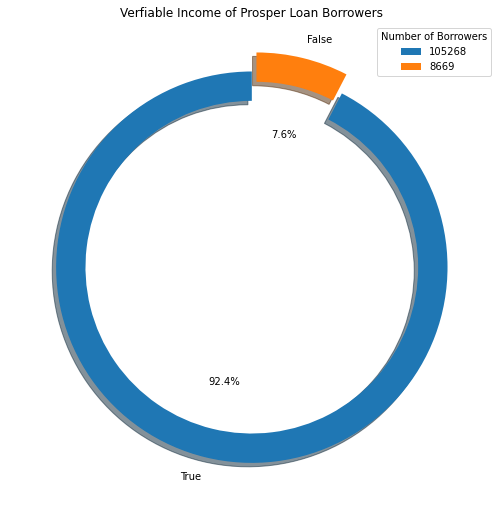

In [36]:
# I would like to get a feel for the data by using a piechart, it is straightforwrd for the boolean data type this 
# column represents

plt.figure(figsize = (15, 9))

loan['IncomeVerifiable'].value_counts(normalize = True).plot(kind = 'pie', wedgeprops = {'width' : .15},
       labels = loan['IncomeVerifiable'].value_counts().index, startangle = 90, counterclock = True,
                                                            shadow = True, explode = [0, 0.1], autopct = '%1.1f%%')
plt.xlabel('')
plt.ylabel('')
plt.title('Verfiable Income of Prosper Loan Borrowers')
plt.legend(title = 'Number of Borrowers', labels = loan['IncomeVerifiable'].value_counts().values);

##### <font color = 'teal'>Observation(s):

> Most borrowers have a verifiable source of income.

#### <font color = 'teal'>7. Number of Loans with Prosper Loans by Borrowers</font>

##### How many loans have borrowers taken with the loan company?

In [37]:
# I would like to know more about the highest number of loans borrowers have taken out

loan['TotalProsperLoans'].nunique()

9

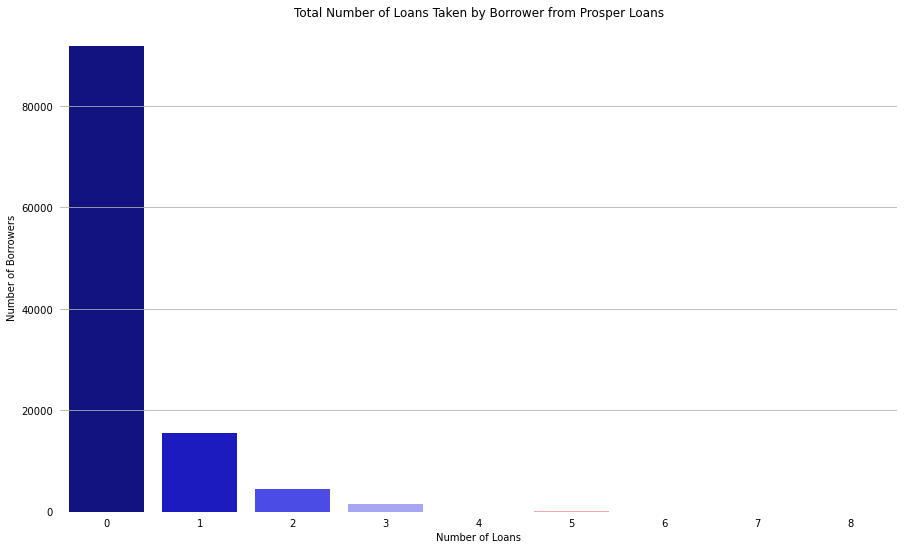

In [38]:
# Let me see the frequency of these loan occurences

fig, ax = plt.subplots(figsize = (15, 9))

sns.countplot(data = loan, x = 'TotalProsperLoans', palette = 'seismic')
plt.title('Total Number of Loans Taken by Borrower from Prosper Loans')
plt.xlabel('Number of Loans')
plt.ylabel('Number of Borrowers')
plt.grid(b = 'visible', axis = 'y')
plt.tick_params(bottom = False, left = False)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

##### <font color = 'teal'>Observation(s):

> Most people do not take out more than one loan form Prosper Loans. The number of those who do reduces as the number of loans increase.

#### <font color = 'teal'>7. Stated Monthly Income Frequency</font>

##### What is the median salary? What are the maximum and minimum salaries?

In [39]:
# Let's look at the maximum and minimum monthly salaries of borrowers of the loan company

print(loan['StatedMonthlyIncome'].max())
print(loan['StatedMonthlyIncome'].min())

1750002.917
0.0


(0.0, 20000.0)

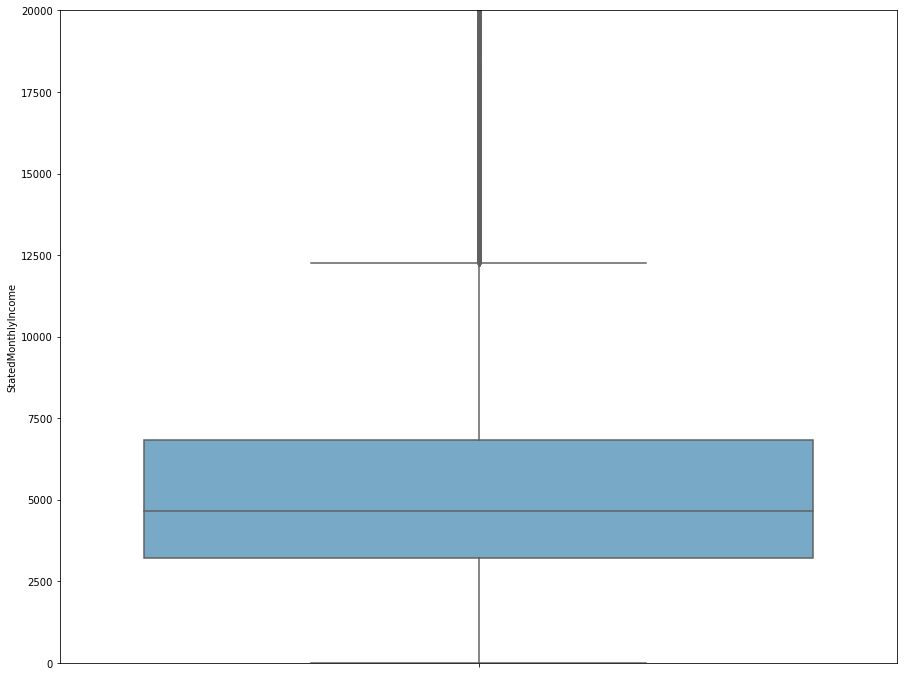

In [40]:
fig, ax = plt.subplots(figsize = (15, 12))

sns.boxplot(data = loan, y = loan['StatedMonthlyIncome'], palette = 'Blues')
plt.ylim(0, 20000)

In [41]:
(loan['StatedMonthlyIncome']).describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

##### <font color = 'teal'>Observation:
> The median salary lies around 4, 600 dollars per month, while the maximum salary is 1, 750, 002.917 dollars and the minimum is 0.00 dollars.

### <font color = 'teal'>Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
    
> I needed to transform the stated monthly income as it was not producing a visible set of readings on the countplot I used. For the other plots, such as the occupation frequency, I used subsets of the data by slicing it. There were no unusual points.

### <font color = 'teal'>Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>When investigating the debt to income ratio and the borrower annual percentage rate, I converted them to percentage figures instead of ratios in order to create a better understanding and visualization of the figures. I also made the listing categories qualitative, with the information in the loan terms key. This enabled me to categorize the data better. I also renamed those two columns to prevent misunderstandings. The below are the listing categories and their numeric keys I derived them from:
>
>0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

### <font color = 'teal'>Bivariate Plots</font>

***

I am going to start off with a general overview of majority of the variables I would like to work with. Some are the borrower Annual Percentage Rate (APR), the Debt To Income (DTI) ratio, Stated Monthly Income, the Occupation, Borrower State, and a few others, in order to gain meaningful insights. I will also include some other variables that I have not explored until now.

#### <font color = 'teal'>General overview of variables to be explored</font>

<Figure size 1080x1080 with 0 Axes>

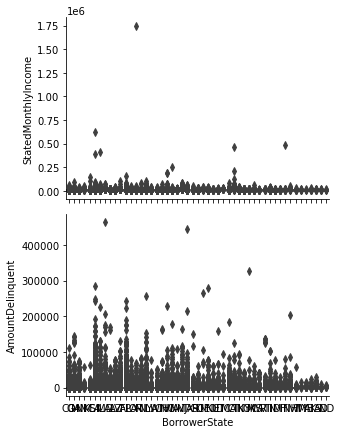

In [42]:
def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)
    
plt.figure(figsize = [15, 15])
g = sns.PairGrid(data = loan, y_vars = ['StatedMonthlyIncome', 'AmountDelinquent'], x_vars = ['BorrowerState'],
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

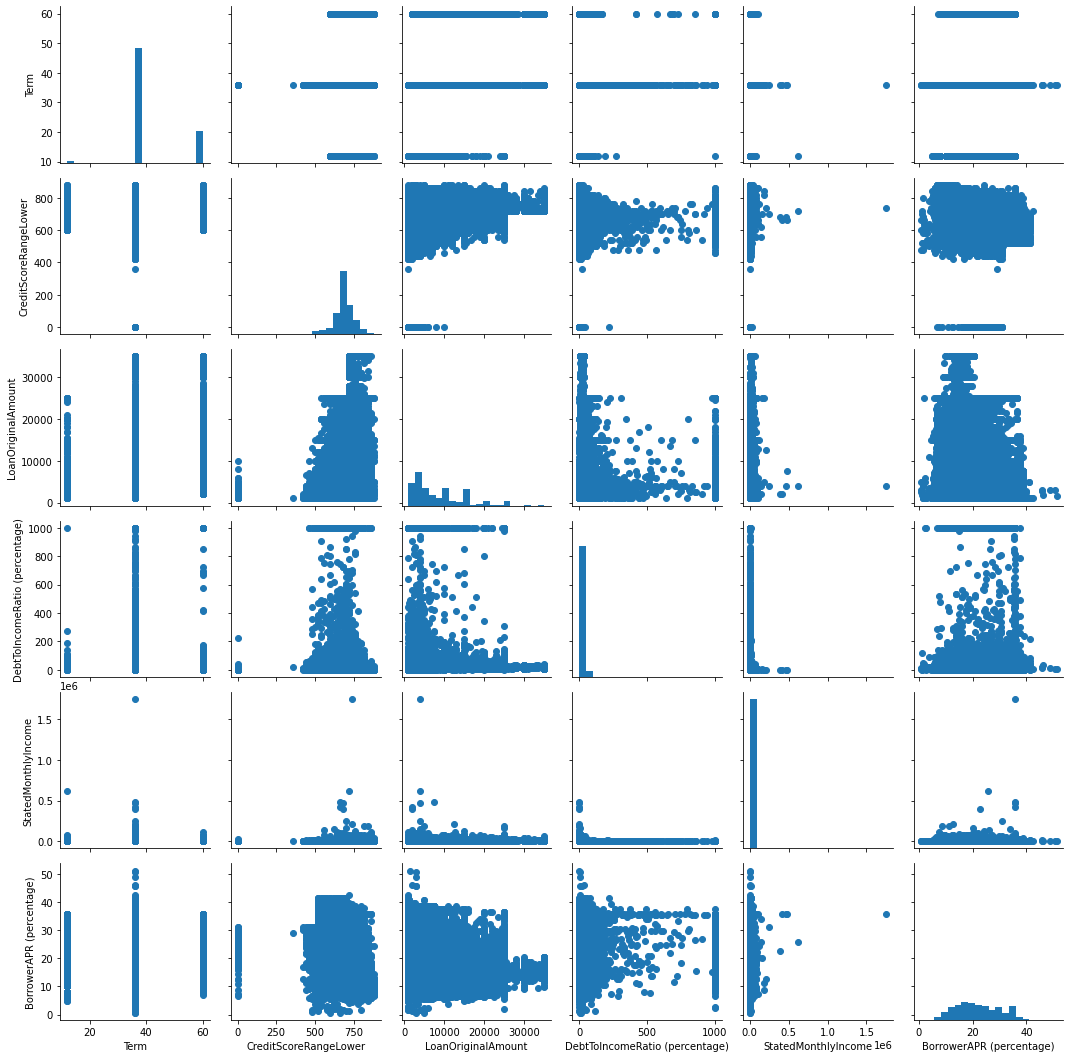

In [43]:
# I would like to see all of these at a glance

numeric_vars = ['Term', 'CreditScoreRangeLower', 'LoanOriginalAmount', 'DebtToIncomeRatio (percentage)',
                'StatedMonthlyIncome', 'BorrowerAPR (percentage)']

g = sns.PairGrid(data = loan, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

Number of rows and columns =  (113937, 23)
loan_samp rows and columns =  (2000, 23)


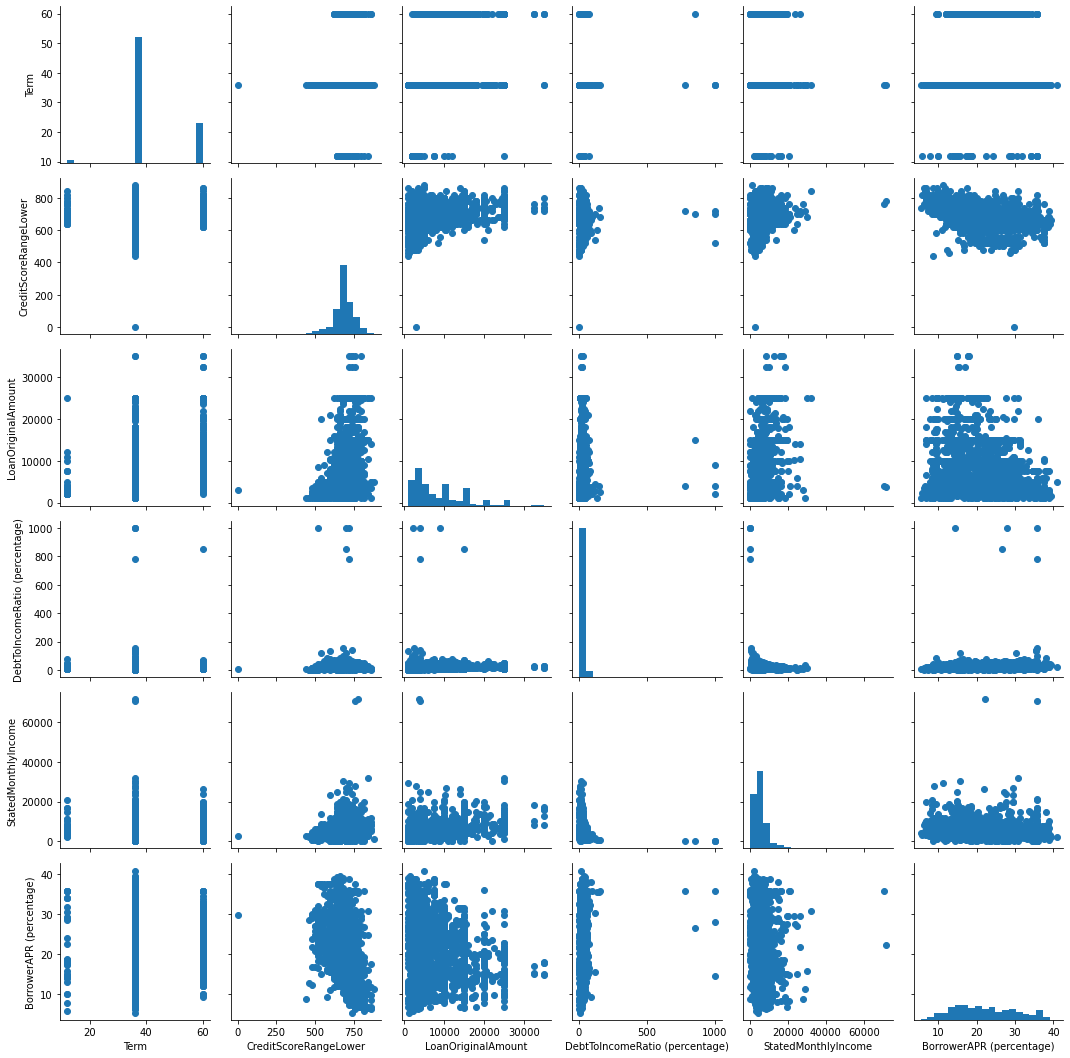

In [44]:
#  The above looks overplotted, so I am going to work with a samplw of it and see what I can glean from it
print("Number of rows and columns = ",loan.shape)
loan_samp = loan.sample(n=2000, replace = False)
print("loan_samp rows and columns = ",loan_samp.shape)

g = sns.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

#### <font color = 'teal'>Observation(s):
    
> The debt to income ratio versus the original loan amount is slightly skewed to the right.  It seems to reduce with an increase in the loan amount. It will be interesting to see what affects that observation. 
>
>More credit ranges seem to lie in the 36 month term of loans, that also seems to be the most popular loan term. 
>
>The original loan amount and the credit range looks like it could increase in the middlemost credit score range. The credit range appears to be higher for higher loan amounts.

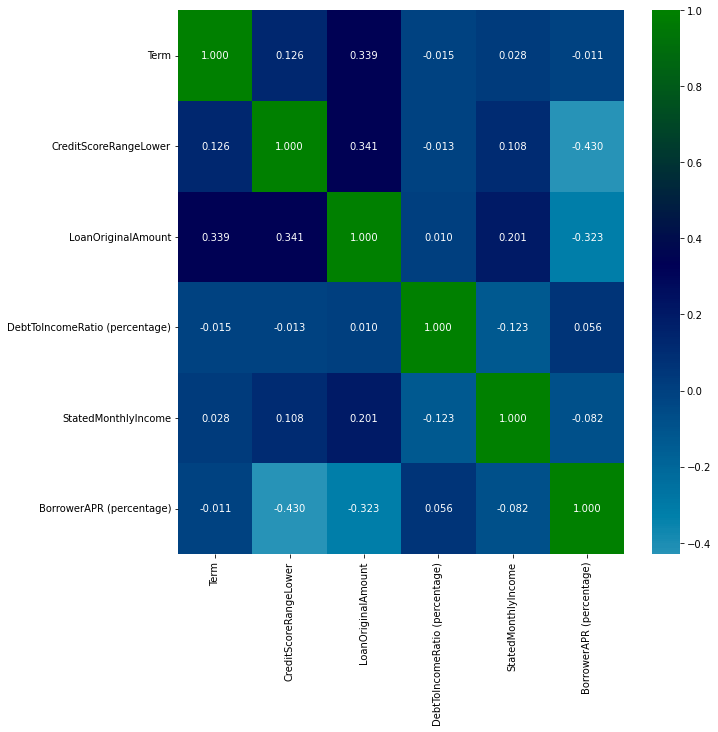

In [45]:
# Let us have a look at a correlation map

plt.figure(figsize = [10, 10])
sns.heatmap(loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'ocean_r', center = 0)
plt.show()

#### <font color = 'teal'>Observation(s):
    
> Most of the variables seem to have no correlation as they hover around 0. However, in those seemingly minor variations, there may be more to it. For instance, the negative correlation between the credit score and the borrowers APR, the loan amount and the borrowers APR. They appear to be key points in my sliced data.

#### <font color = 'teal'>Bivariate Exploration</font>

#### <font color = 'teal'>1. The Relationship Between Loan Term and the Amount Delinquencies</font>

##### Does the loan term affect the delinquency (missed payment) amount ie. unpaid loan amounts? For example, do longer loan terms allow for less delinquencies because borrowers have enough time to pay and plan for payments, and vice versa? How best can this be shown?

***

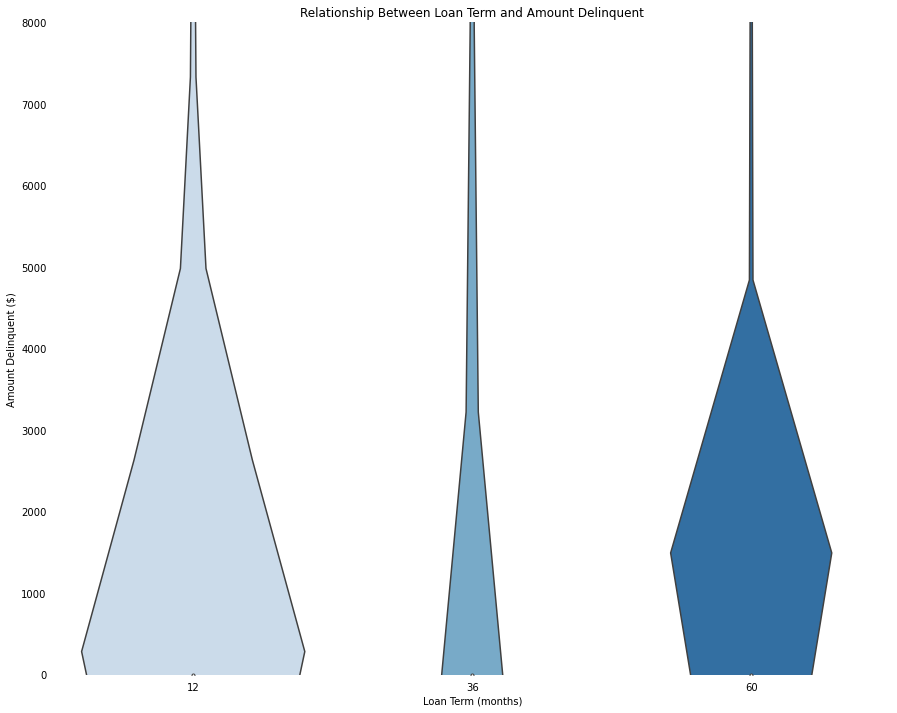

In [46]:
# # I would like to wok with the delinquent loans that are known for this part, thus the data I have subset once again

fig, ax = plt.subplots(figsize = (15, 12))

sns.violinplot(data = loan[~loan['AmountDelinquent'].isnull()], x = 'Term', y = 'AmountDelinquent', palette = 'Blues')
plt.xlabel('Loan Term (months)')
plt.ylabel('Amount Delinquent ($)')
plt.title('Relationship Between Loan Term and Amount Delinquent')
plt.tick_params(bottom = False, left = False)
plt.ylim(-1, 8000)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

##### <font color = 'teal'>Observation(s):
    
> The most delinquents belong to borrowers who had the 12 month term, though they are the lowest delinquent amount of the other loan terms.
>
>Those delinquent in the 36 month term have the least amount of delinquent payments and borrowers. This means they tend to pay up their, and there are fewer of them who are not owing in loans. 
>
>Those with 60 month terms lie between the 12 and 36 month term borrowers in terms of the amount delinquent and how many of them there are with delinquencies. Their delinquent amunts are higher.

#### <font color = 'teal'>2. Relationship between stated monthly income and the original loan amount</font>
***

What is this relationship like? Do those with higher incomes  have a higher loan amount?

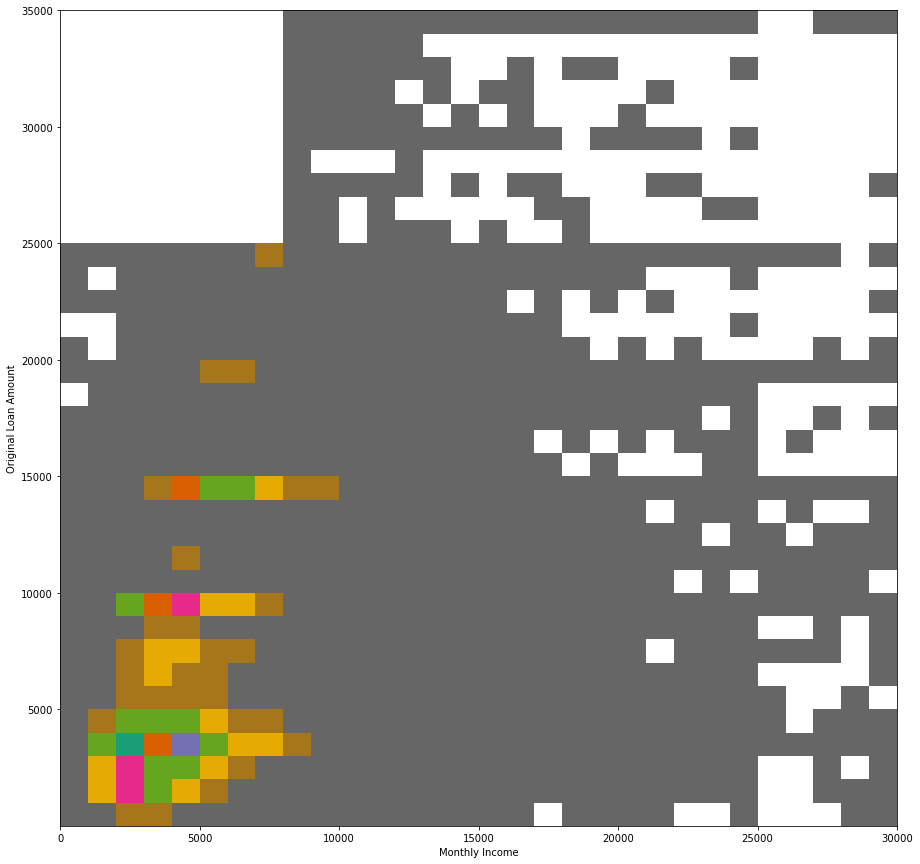

In [47]:
# Let us look at this with a 2D histogram

plt.figure(figsize = (15, 15))

bins_x = np.arange(1, loan['StatedMonthlyIncome'].max()+1000, 1000)
bins_y = np.arange(1, loan['LoanOriginalAmount'].max()+1000, 1000)
plt.hist2d(data = loan, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', cmin = .5, cmap = 'Dark2_r',
           bins = (bins_x, bins_y))
plt.xlabel('Monthly Income')
plt.ylabel('Original Loan Amount')
plt.xlim(0, 30000);

##### <font color = 'teal'>Observation(s):
    
> Those with a higher income have a tendency to get higher loan amounts.
    


#### <font color = 'teal'>3. What is the relationship between the amount delinquent and the number of accounts delinquent?</font>

Does the amount delinquent have anything to do with the number of delinquencies a borrower may have?

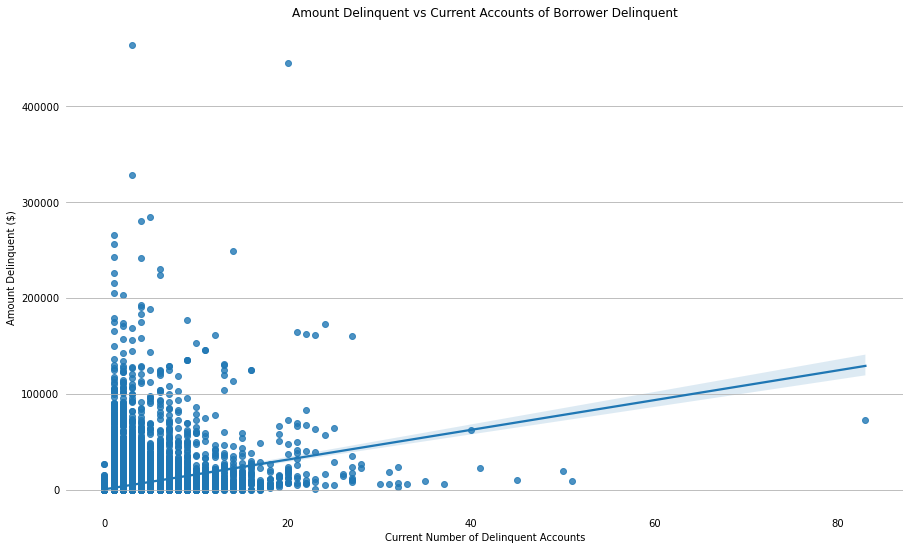

In [48]:
fig, ax = plt.subplots(figsize = (15, 9))

sns.regplot(data = loan, x = 'CurrentDelinquencies', y = 'AmountDelinquent')
plt.xlabel('Current Number of Delinquent Accounts')
plt.ylabel('Amount Delinquent ($)')
plt.title('Amount Delinquent vs Current Accounts of Borrower Delinquent')
plt.tick_params(bottom = False, left = False)
plt.grid(b = 'visible', axis = 'y')

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

##### <font color = 'teal'>Observation(s):

> The the more delinquent accounts a borrower has, the more likely they are to have a lower delinquent amount. This means that though they have borrowed less, they are still less likely to pay and are serially not loan repayers.
>
> Most deliquent borrowers of higher amounts are not serial delinquent much of the time and may have missed out only a few payments due to the higher amounts to be repaid..

#### <font color = 'teal'>4. Amount delinquent and its relationship with the stated monthly income</font>

***
##### What income category of borrowers are likely to be more delinquent? To what extent is their delinquency?

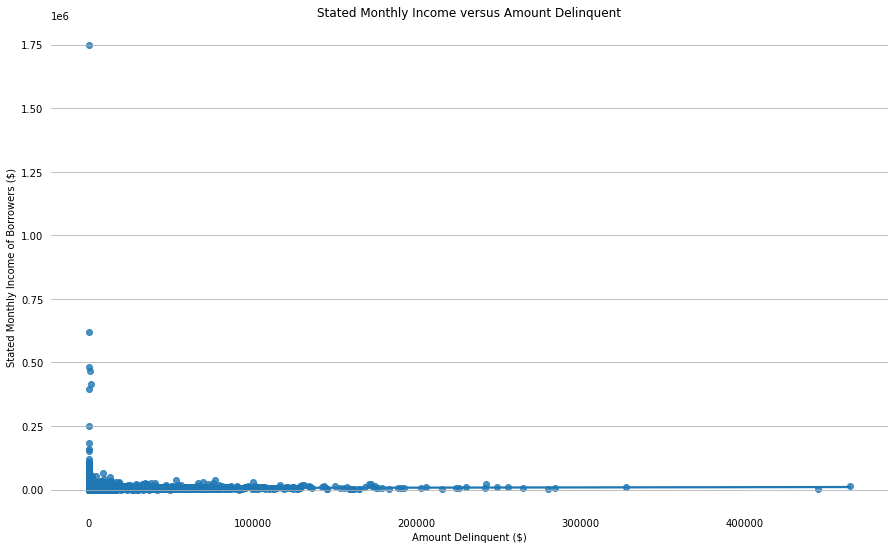

In [49]:
# I will have a look at this with the below plot 

fig, ax = plt.subplots(figsize = (15, 9))

sns.regplot(data = loan, x ='AmountDelinquent', y = 'StatedMonthlyIncome', x_jitter = .5)
plt.xlabel('Amount Delinquent ($)')
plt.ylabel('Stated Monthly Income of Borrowers ($)')
plt.title('Stated Monthly Income versus Amount Delinquent')
plt.tick_params(bottom = False, left = False)
plt.grid(b = 'visibl', axis = 'y')

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

##### <font color = 'teal'>Observation(s):

> The lower the income, the more likely to be delinquent the borrower will be, and the higher the amount delinquent. Delinquency appears to be a feature of those with lower income. I will later like to know about the employment status of the borrower and the term of the loan.

#### <font color = 'teal'>5. DTI, APR and the effect of loan term</font>
***
Are those with more income given longer loan terms and lower borrower rates and higher loan amounts? How about those with different employment stauses?

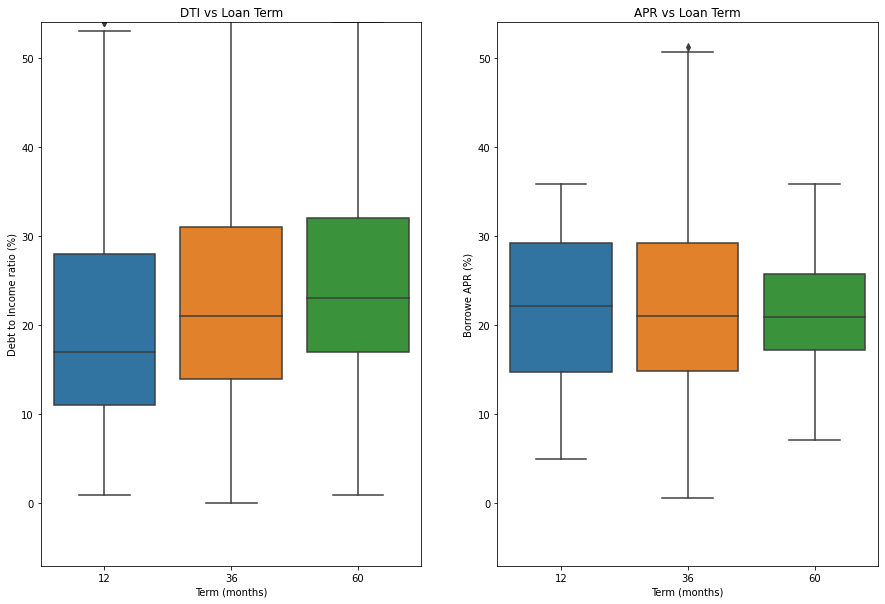

In [50]:
# Take note of the values of the ticks on the both plots

fig, ax = plt.subplots(figsize = (15, 10))

plt.subplot(1, 2, 1)
sns.boxplot(data = loan, x = 'Term', y = 'DebtToIncomeRatio (percentage)')
plt.title('DTI vs Loan Term')
plt.xlabel('Term (months)')
plt.ylabel('Debt to Income ratio (%)')
plt.ylim(-7, 54);

plt.subplot(1, 2, 2)
sns.boxplot(data = loan, x = 'Term', y = 'BorrowerAPR (percentage)')
plt.xlabel('Term (months)')
plt.ylabel('Borrowe APR (%)')
plt.title('APR vs Loan Term')
plt.ylim(-7, 54);

In [51]:
# The statistics of the above plot

loan[['DebtToIncomeRatio (percentage)', 'BorrowerAPR (percentage)']].describe()

,DebtToIncomeRatio (percentage),BorrowerAPR (percentage)
count,105383.000000,113912.000000
mean,27.594660,21.882766
std,55.175889,8.036408
min,0.000000,0.653000
25%,14.000000,15.629000
50%,22.000000,20.976000
75%,32.000000,28.381000
max,1001.000000,51.229000


##### <font color = 'teal'>Observation(s):

> From observing the medians of both sets of box plots (as well as other quartiles), it is safe to say that DTI increases with the loan term, while APR decreases with increase in the loan term, though marginally.

#### <font color = 'teal'>6. How does the employment status of borrowers affect the DTi and APR percentages?</font>

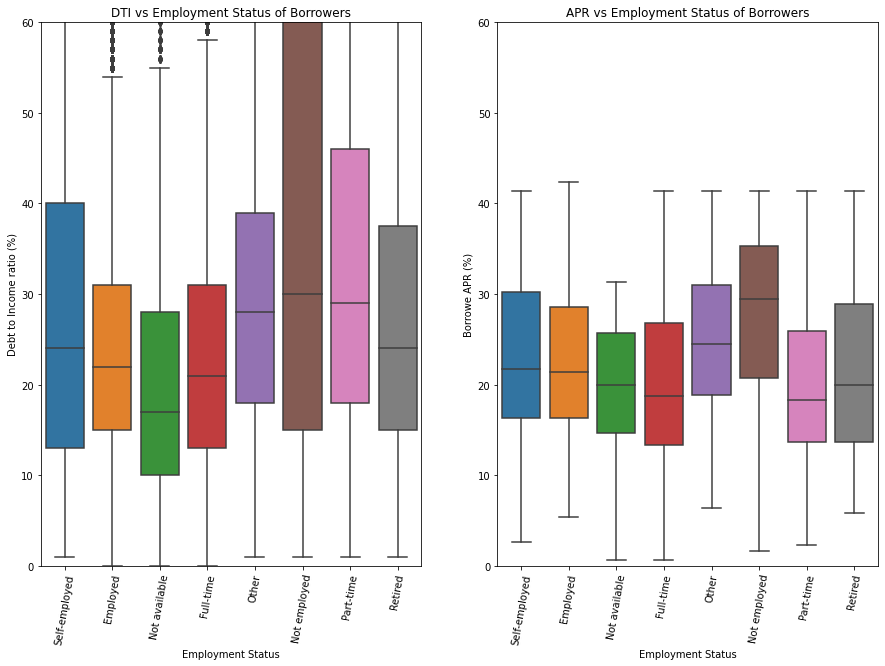

In [52]:
# A look at the effect of employment on DTI and APR side-by-side

fig, ax = plt.subplots(figsize = (15, 10))

plt.subplot(1, 2, 1)
sns.boxplot(data = loan, x = 'EmploymentStatus', y = 'DebtToIncomeRatio (percentage)')
plt.title('DTI vs Employment Status of Borrowers')
plt.xlabel('Employment Status')
plt.ylabel('Debt to Income ratio (%)')
plt.ylim(0, 60)
plt.xticks(rotation = 80);

plt.subplot(1, 2, 2)
sns.boxplot(data = loan, x = 'EmploymentStatus', y = 'BorrowerAPR (percentage)')
plt.xlabel('Employment Status')
plt.ylabel('Borrowe APR (%)')
plt.title('APR vs Employment Status of Borrowers')
plt.xticks(rotation = 80)
plt.ylim(0, 60);

In [53]:
# Let us see this statistically 

loan.groupby('EmploymentStatus')[['DebtToIncomeRatio (percentage)', 'BorrowerAPR (percentage)']].describe()

DebtToIncomeRatio (percentage)                               \
                                          count        mean         std  min   
EmploymentStatus                                                               
Employed                                65896.0   25.363360   28.931315  0.0   
Full-time                               25591.0   26.720253   54.124399  0.0   
Not available                            5252.0   31.209978   92.276377  0.0   
Not employed                               96.0  305.604167  439.179869  1.0   
Other                                    3526.0   36.040272   65.123055  1.0   
Part-time                                 969.0   56.236326  134.050513  1.0   
Retired                                   735.0   39.805442   92.731052  1.0   
Self-employed                            1092.0   98.198718  249.444435  1.0   

                                             BorrowerAPR (percentage)  \
                   25%   50%     75%     max                    count   
EmploymentStatus                                                        
Employed          15.0  22.0    31.0  1001.0                  67322.0   
Full-time         13.0  21.0    31.0  1001.0                  26355.0   
Not available     10.0  17.0    28.0  1001.0                   5347.0   
Not employed      15.0  30.0  1001.0  1001.0                    835.0   
Other             18.0  28.0    39.0  1001.0                   3806.0   
Part-time         18.0  29.0    46.0  1001.0                   1088.0   
Retired           15.0  24.0    37.5  1001.0                    795.0   
Self-employed     13.0  24.0    40.0  1001.0                   6134.0   

                                                                         \
                       mean       std    min       25%     50%      75%   
EmploymentStatus                                                          
Employed          22.355796  7.708180  5.436  16.36100  21.434  28.5950   
Full-time         20.460360  8.660816  0.653  13.34150  18.726  26.7620   
Not available     20.060707  6.841484  0.653  14.70900  19.981  25.7570   
Not employed      27.575674  8.471329  1.657  20.70500  29.510  35.3560   
Other             24.730250  7.593247  6.377  18.84075  24.466  31.0320   
Part-time         20.221122  8.475481  2.323  13.62950  18.294  25.9030   
Retired           21.544951  9.210409  5.842  13.62500  20.011  28.8625   
Self-employed     23.029467  8.314586  2.659  16.32400  21.761  30.2015   

                          
                     max  
EmploymentStatus          
Employed          42.395  
Full-time         41.355  
Not available     31.308  
Not employed      41.355  
Other             41.355  
Part-time         41.355  
Retired           41.355  
Self-employed     41.355

##### <font color = 'teal'>Observation(s):
    
> The DTI percentage has a wider range of values than APR and is expectedly high for the unemployed, likewise the APR percentage. It goes without saying that the highest debt to income ratio percentage is of the unemployed. This means that most of their funds are used to service the debts they have.
>
>Those who are less indebted have more steady / full-time employment, and are more likely to have lower interet rates than those who are self employed than retired for instance. The certainity of ones income determines interest rates and affects the possibility of being indebted.
>
> For the better part APR % is a reflection of the DTI %.
    

#### <font color = 'teal'>7. Does the loan status affect the APR or DTI of a borrower?</font>

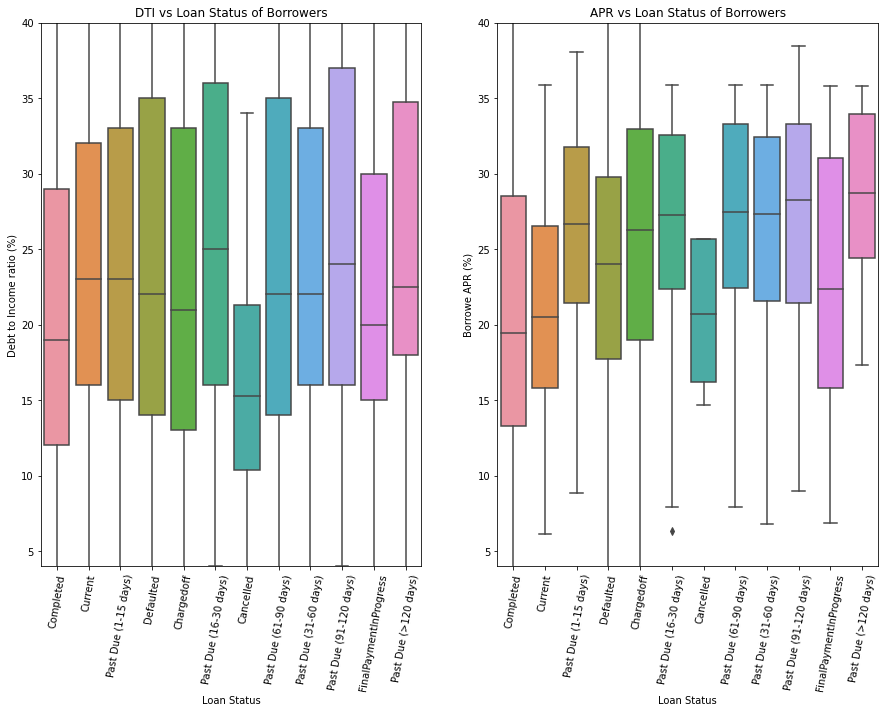

In [54]:
# A look at the effect of employment on DTI and APR side-by-side

fig, ax = plt.subplots(figsize = (15, 10))

plt.subplot(1, 2, 1)
sns.boxplot(data = loan, x = 'LoanStatus', y = 'DebtToIncomeRatio (percentage)')

plt.title('DTI vs Loan Status of Borrowers')
plt.xlabel('Loan Status')
plt.ylabel('Debt to Income ratio (%)')
plt.xticks(rotation = 80)
plt.ylim(4, 40);

plt.subplot(1, 2, 2)
sns.boxplot(data = loan, x = 'LoanStatus', y = 'BorrowerAPR (percentage)')
plt.xlabel('Loan Status')
plt.ylabel('Borrowe APR (%)')
plt.title('APR vs Loan Status of Borrowers')
plt.xticks(rotation = 80)
plt.ylim(4, 40);



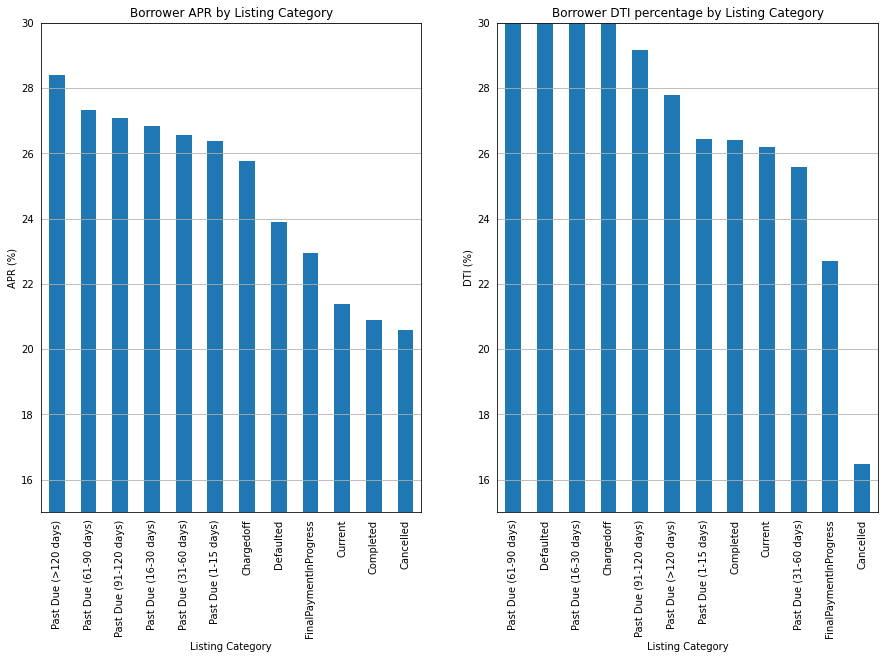

In [55]:
fig, ax = plt.subplots(figsize = (15, 9))

plt.subplot(1, 2, 1)
loan.groupby('LoanStatus')['BorrowerAPR (percentage)'].mean().sort_values(ascending = False).plot(kind ='bar')
plt.title('Borrower APR by Listing Category')
plt.xlabel('Listing Category')
plt.ylabel('APR (%)')
plt.ylim(15, 30)
plt.grid(b = 'visible', axis = 'y')
plt.tick_params(bottom = False, left = False)

plt.subplot(1, 2, 2)
loan.groupby('LoanStatus')['DebtToIncomeRatio (percentage)'].mean().sort_values(ascending = False).plot(kind ='bar')
plt.title('Borrower DTI percentage by Listing Category')
plt.xlabel('Listing Category')
plt.ylabel('DTI (%)')
plt.ylim(15, 30)
plt.grid(b = 'visible', axis = 'y')
plt.tick_params(bottom = False, left = False)

##### <font color = 'teal'>Observation(s):
> I have decided to go with using the median values to evaluate the plots.
>
> Those who have completed loans had it at a lower median APR and also had a lower median DTI than all other loan statuses. >
>
>Those who have payments due past 120 days have the highest APR % median value, and that could have affected their ability to repay the loans. Likewise those with charged off loans.
>   
>

#### <font color = 'teal'>8. What are the states income like?</font>
***
##### Does the income affect the average DTI ratio or borrowers annual percentage rate? What about the relationship between states and occupation?

#### <font color = 'teal'>a. Income and Borrower State

BorrowerState
AK    5880.617500
AL    4759.905747
AR    4851.890546
AZ    5347.031694
CA    6184.829239
CO    5647.535596
CT    7394.696886
DC    6822.251963
DE    5754.263333
FL    5399.216319
GA    5460.783646
HI    6221.879788
IA    3714.396953
ID    4182.105175
IL    5590.820343
IN    5094.876123
KS    5148.677652
KY    4929.388267
LA    5274.876922
MA    6190.189526
MD    6516.032081
ME    3635.320132
MI    4932.191136
MN    4912.895564
MO    4710.876832
MS    4923.626853
MT    4235.046717
NC    5425.282615
ND    3280.017628
NE    4796.570104
NH    5855.356019
NJ    6807.019966
NM    5545.596045
NV    5589.204052
NY    6225.880901
OH    4964.927309
OK    4931.018623
OR    5662.285498
PA    5415.842306
RI    5533.777203
SC    5230.936275
SD    4323.247354
TN    5051.211812
TX    6134.472912
UT    4747.760072
VA    6508.574309
VT    4817.739131
WA    5379.549650
WI    4920.912324
WV    4971.739344
WY    5300.478333
Name: StatedMonthlyIncome, dtype: float64


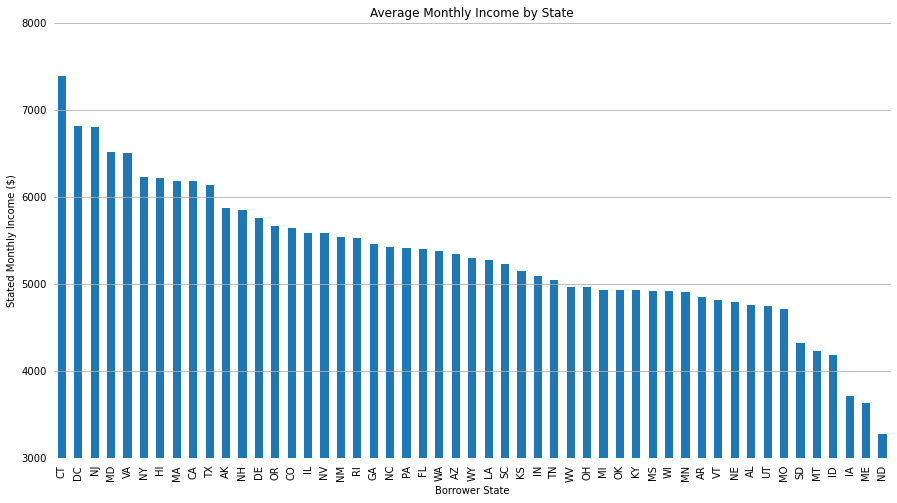

In [56]:
# I want to use the mean income for each state in my exploration then I am going to sort them for use in my plot

print(loan.groupby('BorrowerState')['StatedMonthlyIncome'].mean())

fig, ax = plt.subplots(figsize = (15, 8))

loan.groupby('BorrowerState')['StatedMonthlyIncome'].mean().sort_values(ascending = False).plot(kind ='bar')
plt.title('Average Monthly Income by State')
plt.xlabel('Borrower State')
plt.ylabel('Stated Monthly Income ($)')
plt.ylim(3000, 8000)
plt.grid(b = 'visible', axis = 'y')
plt.tick_params(bottom = False, left = False)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

##### <font color = 'teal'>Observation(s):
    
> Borrowers in Connecticut (CT) have the highest average income monthly exceeding $7, 000 per month, followed by those in Washington DC (DC) and New Jersey (NJ).
>
>The poorer states by income are those of North Dakota (ND), Maine (ME) and Iowa (IA) where the average monthly income is less than \\$4, 000 dollars.

#### <font color = 'teal'>b. Income and Listing Category

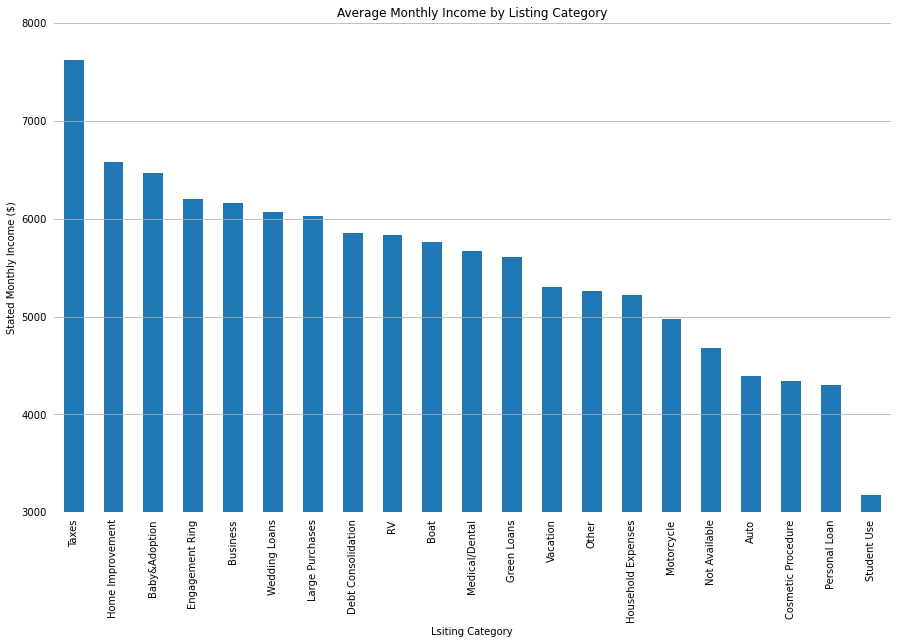

In [57]:
# I will like to look at the income by listing category, to know what the people who take loans out earn

fig, ax = plt.subplots(figsize = (15, 9))

loan.groupby('ListingCategory')['StatedMonthlyIncome'].mean().sort_values(ascending = False).plot(kind ='bar')
plt.title('Average Monthly Income by Listing Category')
plt.xlabel('Lsiting Category')
plt.ylabel('Stated Monthly Income ($)')
plt.ylim(3000, 8000)
plt.grid(b = 'visible', axis = 'y')
plt.tick_params(bottom = False, left = False)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

##### <font color = 'teal'>Observation(s):
    
> Those who took out loans to pay taxes had the highest income. They are probably from connecticut, Washington and New Jersey. It could mean that taxes there are a lot more than that of else where.
>
>Those who had the least income were students, and it is understandable why they need loans, though they may have one of the worst DTI being that they may not be employed or have full-time jobs die to their studies. 

#### <font color = 'teal'>c. Income and Amount Delinquent</font>

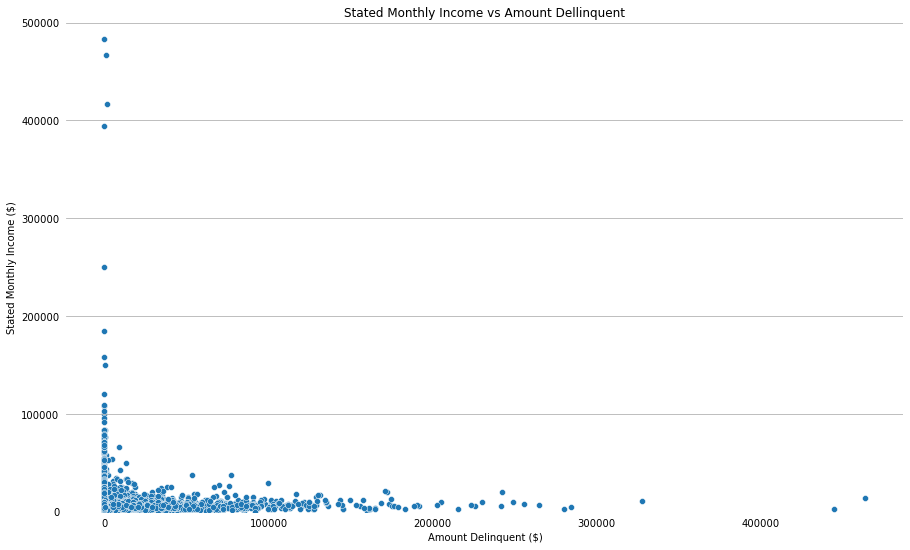

In [58]:
fig, ax = plt.subplots(figsize = (15, 9))

sns.scatterplot(data = loan, y = 'StatedMonthlyIncome', x = 'AmountDelinquent')
plt.title('Stated Monthly Income vs Amount Dellinquent')
plt.xlabel('Amount Delinquent ($)')
plt.ylabel('Stated Monthly Income ($)')
plt.grid(b = 'visible', axis = 'y')
plt.tick_params(bottom = False, left = False)
plt.ylim(0, .5e6)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

##### <font color = 'teal'>Observation(s):
    
> The greater the monthly income, the less the amount delinquent. The less the monthly income, the more likely to have a large amount delinquent by the borrower. That is probably because they have more missed payments, as discovered in the 3rd bivariate exploration above. 

#### <font color = 'teal'>9. Listing category and APR, DTI</font>

##### What is the relationship between listing category and the borrower APR percentage? Between Borrower DTI percentage?

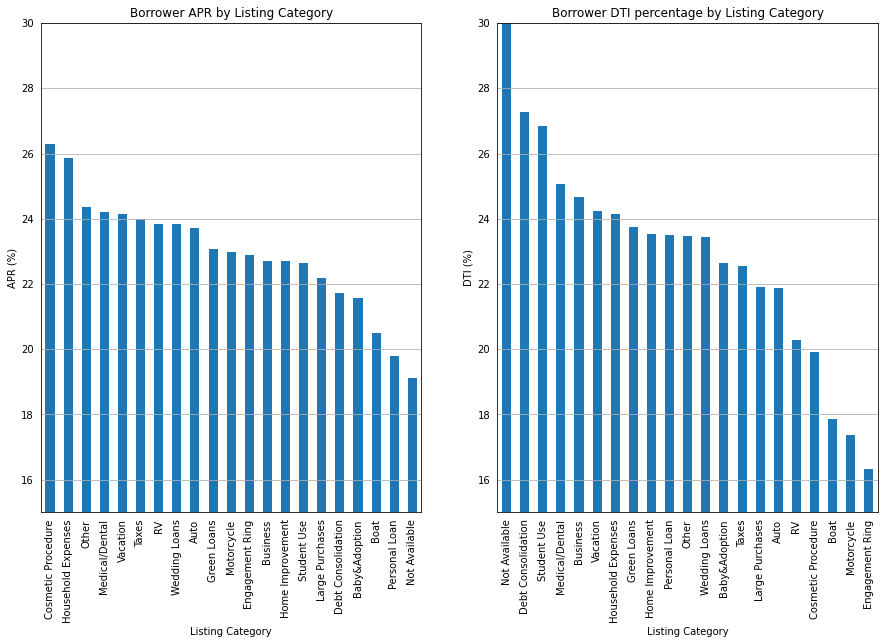

In [59]:
# I will now have a look at the borrower APR and DTI percentages for listing categories

fig, ax = plt.subplots(figsize = (15, 9))

plt.subplot(1, 2, 1)
loan.groupby('ListingCategory')['BorrowerAPR (percentage)'].mean().sort_values(ascending = False).plot(kind ='bar')
plt.title('Borrower APR by Listing Category')
plt.xlabel('Listing Category')
plt.ylabel('APR (%)')
plt.ylim(15, 30)
plt.grid(b = 'visible', axis = 'y')
plt.tick_params(bottom = False, left = False)

plt.subplot(1, 2, 2)
loan.groupby('ListingCategory')['DebtToIncomeRatio (percentage)'].mean().sort_values(ascending = False).plot(kind ='bar')
plt.title('Borrower DTI percentage by Listing Category')
plt.xlabel('Listing Category')
plt.ylabel('DTI (%)')
plt.ylim(15, 30)
plt.grid(b = 'visible', axis = 'y')
plt.tick_params(bottom = False, left = False)

##### <font color = 'teal'>Observation(s):
    
> Those taking out loans for cosmetic proceedures have the highest APR of borrwers at  around 26%, followed by those who need loans for household expenses and medical/dental treatments. This could be because of the risk associated with surgery, vacations and houseold expenses (In the 4th univariate exploration, it is clear that fewer people want cosmetic surgery, yet they have the highest APR. Risk seems the probable reason why.) 
>
> Those who took out cosmetic loans have a lower mean debt to income ratio, meaning that they are financially more responsible than those who need loans for debt consilidation and have the highest known listing DTI percentage. Those with expensive recreational tastes tend to be better off and live more debt free than those who need it for essential use.

#### <font color = 'teal'>10. What is the relationship between the loan amount and the occupation of the borrower?</font>

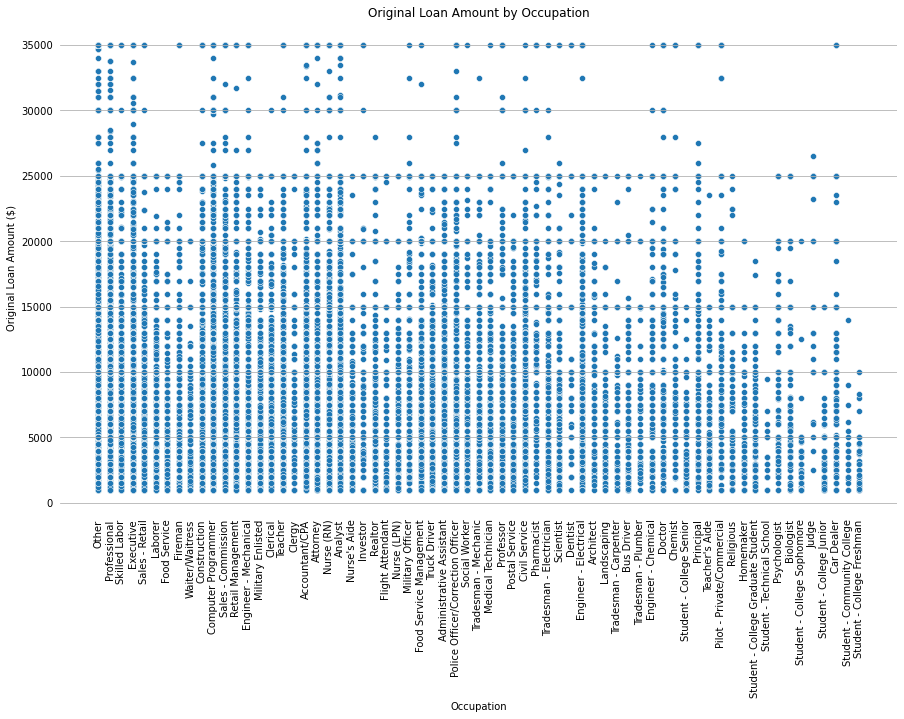

In [60]:
# I would like to see if the listing category had anyting to do with the loan amount disbursed

fig, ax = plt.subplots(figsize = (15, 9))

sns.scatterplot(data = loan, x = 'Occupation', y = loan['LoanOriginalAmount'].sort_values(ascending = False))
plt.xticks(rotation = 65);
plt.title('Original Loan Amount by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Original Loan Amount ($)')
plt.grid(b = 'visible', axis = 'y')
plt.tick_params(bottom = False, left = False)
plt.xticks(rotation = 90)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

##### <font color = 'teal'>Observation(s):
    
> The original loan amount was highest in known professions for professionals, then skilled labour and executives. 
>
>The lowest loan amounts were given to students, and that is probably because of their high DTI percentage as seen in the  9th bivariate exploration.

#### <font color = 'teal'>11 Average income and loan term
***
    
##### What is the average income  of each loan term category?

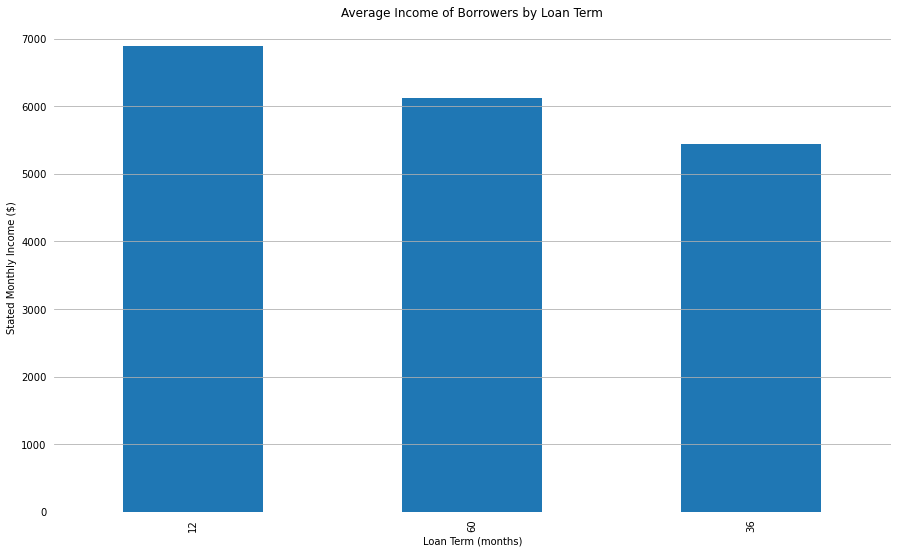

In [61]:
# I would like to look at the income averages for the loan terms

fig, ax = plt.subplots(figsize = (15, 9))

loan.groupby('Term')['StatedMonthlyIncome'].mean().sort_values(ascending = False).plot(kind ='bar')
plt.title('Average Income of Borrowers by Loan Term')
plt.xlabel('Loan Term (months)')
plt.ylabel('Stated Monthly Income ($)')
plt.grid(b = 'visible', axis = 'y')
plt.tick_params(bottom = False, left = False)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

##### <font color = 'teal'>Observations(s):
    
> It appears that the highest income earners were given 12 months (the shortest loan term) to repay their loans. They are able to cope with payments and have less delinquencies and a lower debt to income percentage. Meanwhile, those with an average less income are given longer loan terms.

#### <font color = 'teal'>b. Loan original amount and term

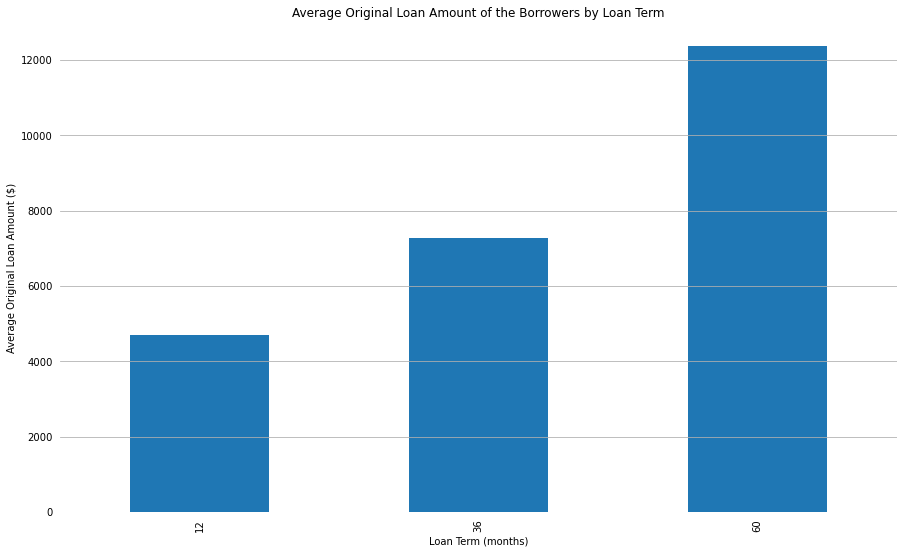

In [62]:
# I would like to look at the average loan original amount for the loan terms

fig, ax = plt.subplots(figsize = (15, 9))

loan.groupby('Term')['LoanOriginalAmount'].mean().sort_values().plot(kind ='bar')
plt.title('Average Original Loan Amount of the Borrowers by Loan Term')
plt.xlabel('Loan Term (months)')
plt.ylabel('Average Original Loan Amount ($)')
plt.grid(b = 'visible', axis = 'y')
plt.tick_params(bottom = False, left = False)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

##### <font color = 'teal'>Observations(s):
    
> Borrowers who were given the largest amount of money on loan were the ones who had the longest loan terms. From the previous exploration, their income is not high, but they were considered for the highest loan amounts and givenenough payment time to avoid delinquency.

### <font color = 'teal'>Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
    
> I noticed that the debt to income ratio is higher in lower earners than it is in higher earners, and it is higher among borrowers that seem to need loans for mostly non-recreational use. Certain states had higher income and in turn tended to get more loan amounts. The APR of people who needed a loan for cosmetic proceedures is the highest and it is the least for those who needed a personal loan, however, they are less indebted than other listed category borrowers.
>
> Meanwhile people in Washington DC tend to keep clear  of debt more so than other states.
> Self employment gives the highest source of income to americans, while retirees are well-off compared to those who work part-time.
> The state with the highest income was Connecticut, and that is because of a borrower who earned over 1,000,000 dollars in a month. I decided to keep the outlier, because when it comes to income, nothing is impossible. North Dakota is the poorest of the states by income.

### <font color = 'teal'>Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
    
> The less the delinquencies, the higher the delinquent amount. This was surprising to me, as I expected more delinquent borrowers to have a higher amount owed. I also noticed that shorter loan terms had the highest amount of delinquencies, while the 36 months term had the least. 

### <font color = 'teal'>Multivariate Plots</font>

#### <font color = 'teal'>1. Debt to income ratio versus borrower APR and loan term</font>

(0.0, 200.0)

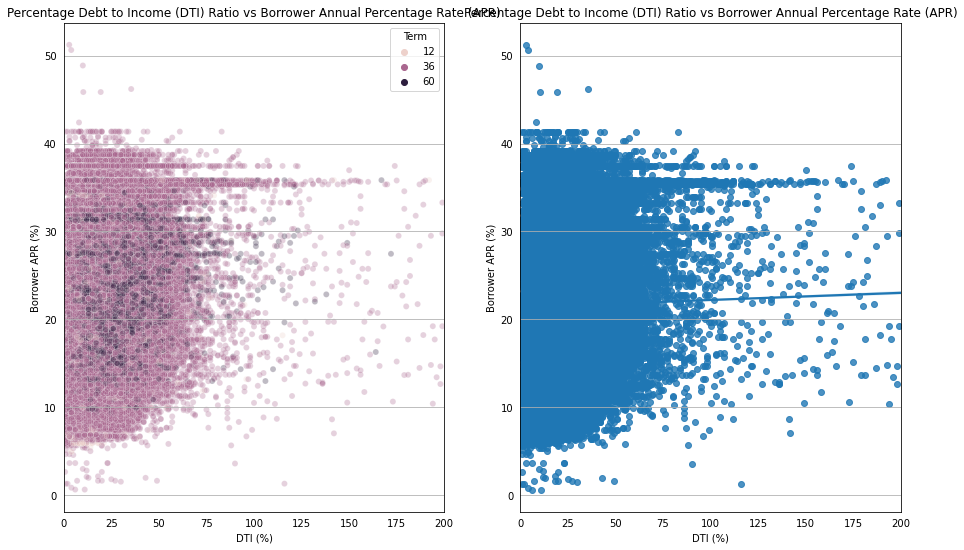

In [63]:
# From the pairgrid, I could see almost no relationship, but I am going to chabe the x-axis limits and see what turns up

fig, ax = plt.subplots(figsize = (15, 9))

plt.subplot(1, 2, 1)
sns.scatterplot(data = loan, x = 'DebtToIncomeRatio (percentage)', y = 'BorrowerAPR (percentage)' , hue = 'Term', alpha = .3)
plt.title('Percentage Debt to Income (DTI) Ratio vs Borrower Annual Percentage Rate (APR)')
plt.xlabel('DTI (%)')
plt.ylabel('Borrower APR (%)')
plt.tick_params(bottom = False, left = False)
plt.grid(b = 'visible', axis = 'y')
plt.xlim(0, 200)

plt.subplot(1, 2, 2)
sns.regplot(data = loan, x = 'DebtToIncomeRatio (percentage)', y = 'BorrowerAPR (percentage)')
plt.title('Percentage Debt to Income (DTI) Ratio vs Borrower Annual Percentage Rate (APR)')
plt.xlabel('DTI (%)')
plt.ylabel('Borrower APR (%)')
plt.tick_params(bottom = False, left = False)
plt.grid(b = 'visible', axis = 'y')
plt.xlim(0, 200)

#### <font color = 'teal'>Observation(s):
    
> Borrower APR and the DTI% are fairly proportional and similar in value, though it is not always predictable. The DTI% range is much larger than the APR. MOst loan terms fall into the 36 month category.

#### <font color = 'teal'>2. Income versus other variables that could have a possible effect on it</font>

#### <font color = 'teal'>a. Income and Borrower APR

Text(0, 0.5, 'BorrowerAPR (%)')

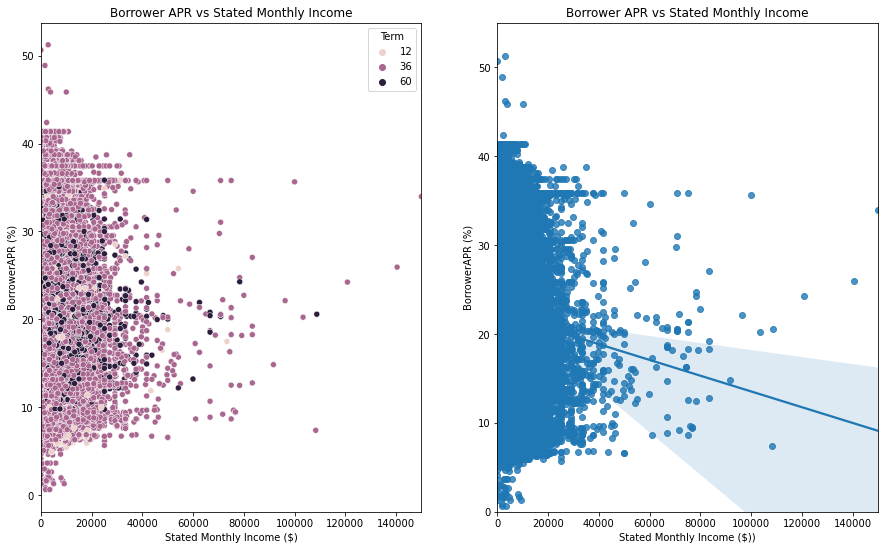

In [64]:
# I am going to look at the scatterplot and regression plot of the income and APR

fig, ax = plt.subplots(figsize = (15, 9))

plt.subplot(1, 2, 1)
sns.scatterplot(data = loan, y = 'BorrowerAPR (percentage)', x = 'StatedMonthlyIncome', hue = 'Term')
plt.xlim(0, .15e6)
plt.title('Borrower APR vs Stated Monthly Income')
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('BorrowerAPR (%)')

plt.subplot(1, 2, 2)
sns.regplot(data = loan, y = 'BorrowerAPR (percentage)', x = 'StatedMonthlyIncome')
plt.xlim(0, .15e6)
plt.ylim(0, 55)
plt.title('Borrower APR vs Stated Monthly Income')
plt.xlabel('Stated Monthly Income ($))')
plt.ylabel('BorrowerAPR (%)')

In [65]:
# Statistically the relationship looks like this

loan[['BorrowerAPR (percentage)', 'StatedMonthlyIncome']].describe()

,BorrowerAPR (percentage),StatedMonthlyIncome
count,113912.000000,1.139370e+05
mean,21.882766,5.608026e+03
std,8.036408,7.478497e+03
min,0.653000,0.000000e+00
25%,15.629000,3.200333e+03
50%,20.976000,4.666667e+03
75%,28.381000,6.825000e+03
max,51.229000,1.750003e+06


##### <font color = 'teal'>Observations(s):
    
> The greatest APR frequency lies between 15 - 20%.The APR is relatively static irregardless of income, though the higher your income the lower your APR could be, and the lower your income the higher your APR.

#### <font color = 'teal'>b. Income and DTI

(-7.0, 120000.0)

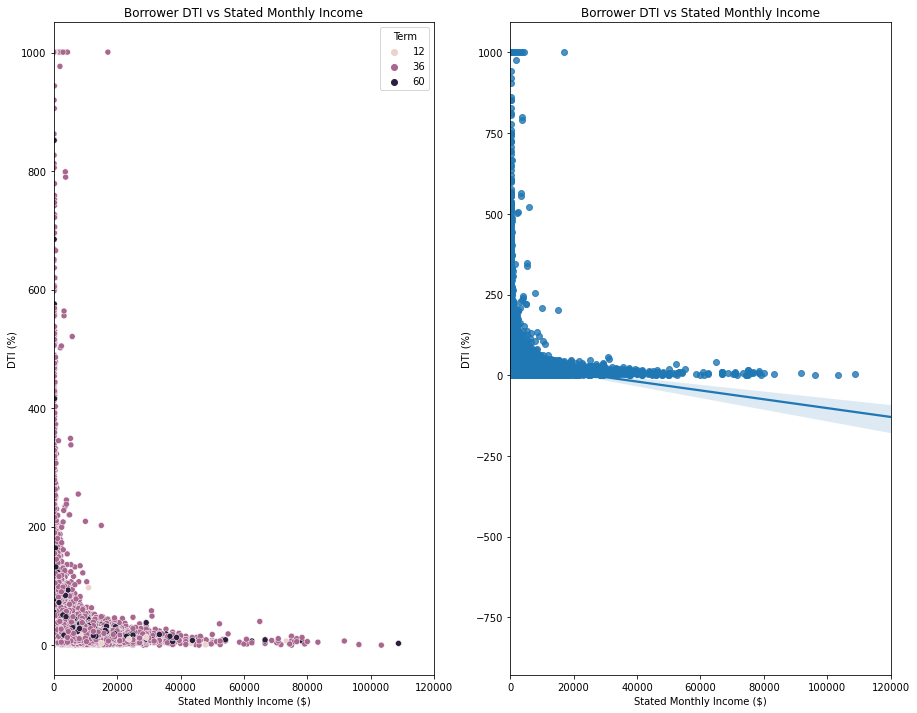

In [66]:
# I am going to focus on the borrower APR and see the relationship between the two

fig, ax = plt.subplots(figsize = (15, 12))

plt.subplot(1, 2, 1)
sns.scatterplot(data = loan, y = 'DebtToIncomeRatio (percentage)', x = 'StatedMonthlyIncome', hue = 'Term')
plt.title('Borrower DTI vs Stated Monthly Income')
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('DTI (%)')
plt.xlim(-7, 120000)

plt.subplot(1, 2, 2)
sns.regplot(data = loan, y = 'DebtToIncomeRatio (percentage)', x = 'StatedMonthlyIncome')
plt.title('Borrower DTI vs Stated Monthly Income')
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('DTI (%)')
plt.xlim(-7, 120000)

##### <font color = 'teal'>Observation(s):
    
> There is an increase in the debt to income ratio for those with less monthly income. If a borrower has a low income, they are likely to have a high debt to income ratio compared to a higher monthly earner. This is shown in the side-by-side regression plot.

#### <font color = 'teal'>3. Credit score range relationships</font>
***
##### What is the relationship between the credit score range and other factors? Are the credit range scores similar or different fundamentally?

#### <font color = 'teal'>a. Credit Ranges relationship with themselves

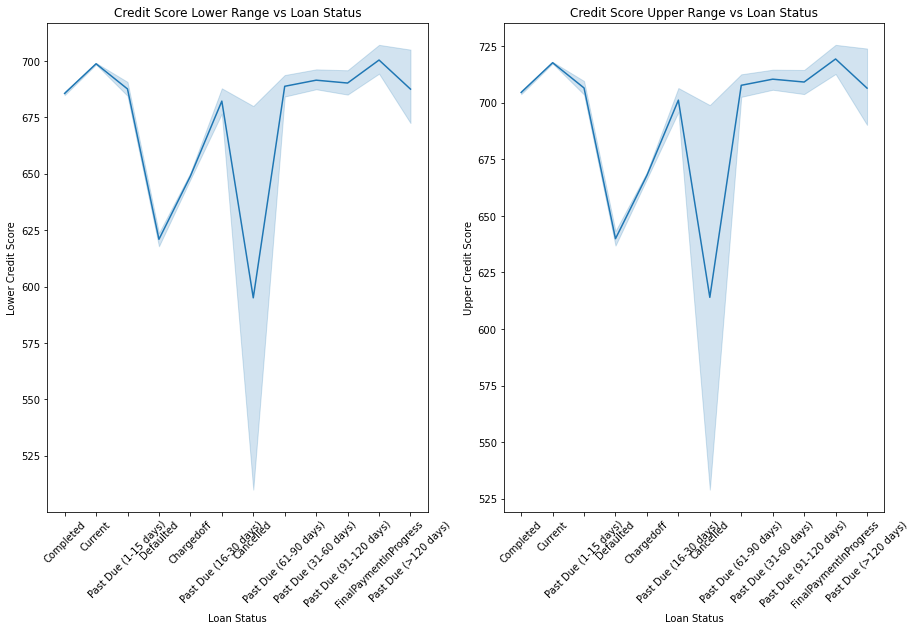

In [67]:
#  Plotting side-by-side to see if there are any differences

fig, ax = plt.subplots(figsize = (15, 9))


plt.subplot(1, 2, 1)
sns.lineplot(data = loan, x = 'LoanStatus', y = 'CreditScoreRangeLower')
plt.xticks(rotation = 45)
plt.title('Credit Score Lower Range vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Lower Credit Score');

plt.subplot(1, 2, 2)
sns.lineplot(data =loan,  x = 'LoanStatus', y = 'CreditScoreRangeUpper')
plt.xticks(rotation = 45)
plt.title('Credit Score Upper Range vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Upper Credit Score');

##### <font color = 'teal'>Observation(s):

> The two credit ranges have the same shape, looking at the plots. Could it be that their difference doesn't deviate? It looks that way, but let us check that and know if it is a dead-end investigation to check if the two credit scores would produce different plots individually.

In [68]:
# Let's check if my above observation could be true

(loan['CreditScoreRangeUpper'] - loan['CreditScoreRangeLower']).describe()

# Turns out it is true: they are the same fundamentally

count    113346.0
mean         19.0
std           0.0
min          19.0
25%          19.0
50%          19.0
75%          19.0
max          19.0
dtype: float64

#### <font color = 'teal'>b. Credit range relationship among "bad loans" (loans that are in bad debt)

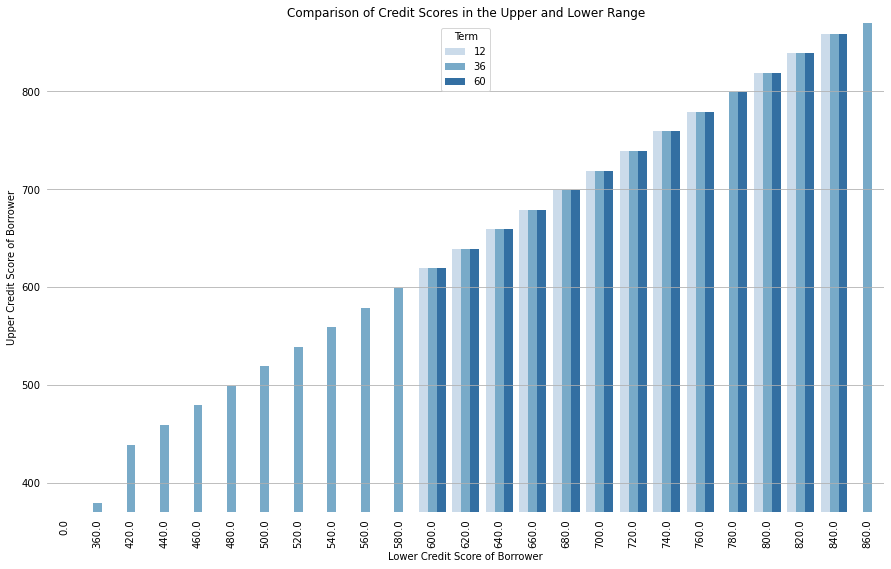

In [69]:
# I want look at the loan stauses that are due and considered bad debt, I would like to try and get insights into these
# What could possibly cause this?

bad_loans = loan[~loan['LoanStatus'].isin(['Current', 'Completed', 'FinalPaymentInProgress'])]
bad_loans

# I will look out for any patterns in the credit range and the term of the loans that are bad

fig, ax = plt.subplots(figsize = (15, 9))

sns.barplot(data = bad_loans, x = 'CreditScoreRangeLower', y = 'CreditScoreRangeUpper', hue = 'Term', palette = 'Blues')

plt.xlabel('Lower Credit Score of Borrower')
plt.ylabel('Upper Credit Score of Borrower')
plt.title('Comparison of Credit Scores in the Upper and Lower Range')
plt.tick_params(left = False, bottom = False)
plt.grid(b = True, axis = 'y')
plt.xticks(rotation = 90)
plt.ylim(370, 870)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

##### <font color = 'teal'>Observation(s):

> It appears that those with a credit rating lower than 600 received only loans with terms of 36 months for both upper and lower credit ranges. The higher a borrowers rating, the more likely they are to receive the longer loan term of 60 months. It appears that a credit score rating of 600 is what distinguishes subprime and prime borrowers of Prosper Loans.

#### <font color = 'teal'>c. Credit range scores and bad debt APR

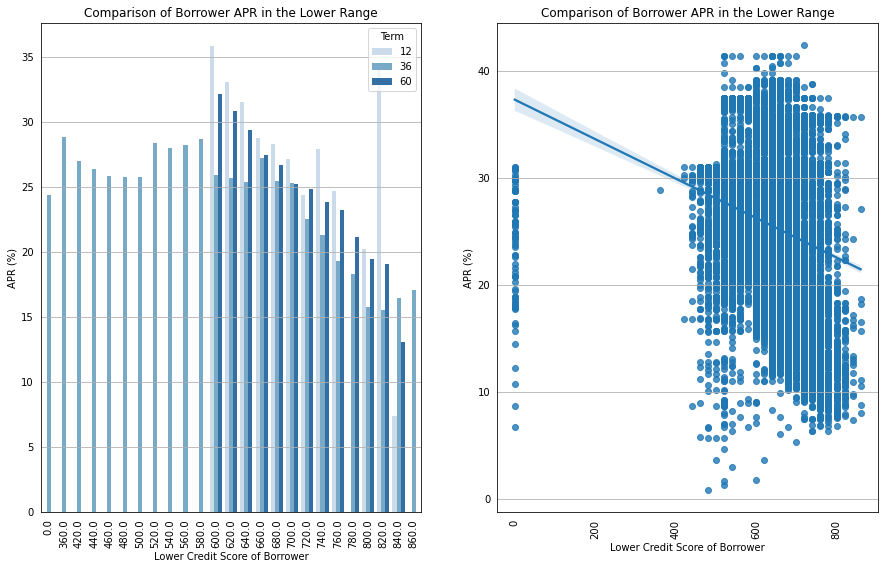

In [70]:
# I am interested to know the relationship between the lower credit rating and the APR rate given to the borrower for those
# with what I have labelled bad loans
# Because the upper and lower credit ranges have the same difference oof 19 points in all credit ratings, they will only 
# produce the same graph, thus this plot will serve for the two of them and that is why I am using only one credit range score

fig, ax = plt.subplots(figsize = (15, 9))

plt.subplot(1, 2, 1)

sns.barplot(data = bad_loans, x = 'CreditScoreRangeLower', y = loan['BorrowerAPR (percentage)'], hue = 'Term', palette = 'Blues', ci = None)
plt.xlabel('Lower Credit Score of Borrower')
plt.ylabel('APR (%)')
plt.title('Comparison of Borrower APR in the Lower Range')
plt.tick_params(left = False, bottom = False)
plt.grid(b = True, axis = 'y')
plt.xticks(rotation = 90);

plt.subplot(1, 2, 2)

sns.regplot(data = bad_loans, x = 'CreditScoreRangeLower', y = 'BorrowerAPR (percentage)')
plt.xlabel('Lower Credit Score of Borrower')
plt.ylabel('APR (%)')
plt.title('Comparison of Borrower APR in the Lower Range')
plt.tick_params(left = False, bottom = False)
plt.grid(b = True, axis = 'y')
plt.xticks(rotation = 90);

##### <font color = 'teal'>Observation(s):

> From the above, borrower APR of the lower and upper credit range decreases the higher the credit score gets. That fact is present in these bad loans. Let us see if it is the same for all the loans. This means that those who pay up their loans without fail have a lower annual percent rate. If a borrower depends on loans, their record will determine what their rate will be. It appears borrowers considered subprime had a credit score ratiing below 600. 
>
>It is likely that this is the determinant of APR percentage for borrowers.

#### <font color = 'teal'>d. Main loan credit score range and borrower APR

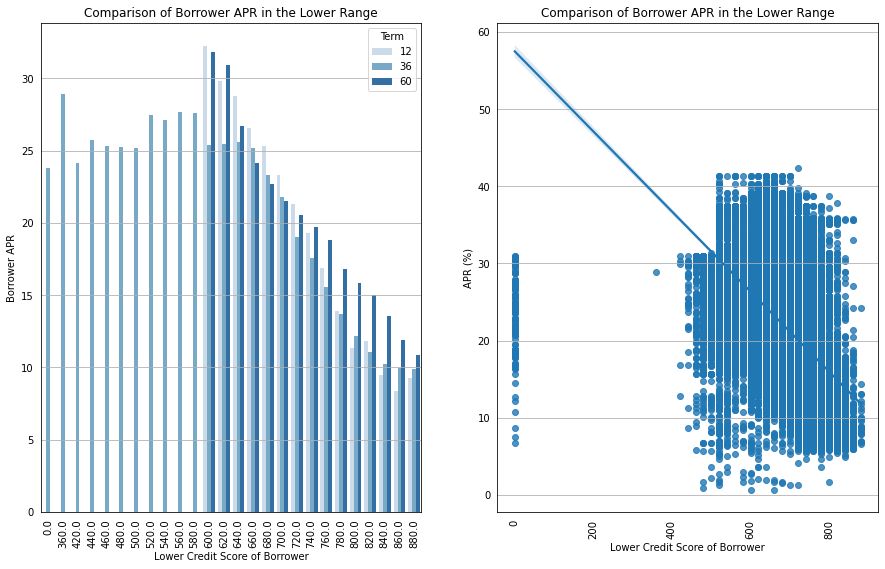

In [71]:
# Checking the relationship for the entire data set

fig, ax = plt.subplots(figsize = (15, 9))

plt.subplot(1, 2, 1)
sns.barplot(data = loan, x = 'CreditScoreRangeLower', y = 'BorrowerAPR (percentage)', hue = 'Term', palette = 'Blues', ci = None)
plt.xlabel('Lower Credit Score of Borrower')
plt.ylabel('Borrower APR')
plt.title('Comparison of Borrower APR in the Lower Range')
plt.tick_params(left = False, bottom = False)
plt.grid(b = True, axis = 'y')
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)

sns.regplot(data = loan, x = 'CreditScoreRangeLower', y = 'BorrowerAPR (percentage)')
plt.xlabel('Lower Credit Score of Borrower')
plt.ylabel('APR (%)')
plt.title('Comparison of Borrower APR in the Lower Range')
plt.tick_params(left = False, bottom = False)
plt.grid(b = True, axis = 'y')
plt.xticks(rotation = 90);

##### <font color = 'teal'>Observation(s):

> This is the same result as the bad loans. The state with the lowest credit rating is New Mexico(NM), and it had the term of 36 months.

#### <font color = 'teal'>e. Credit score range and loan listing categories

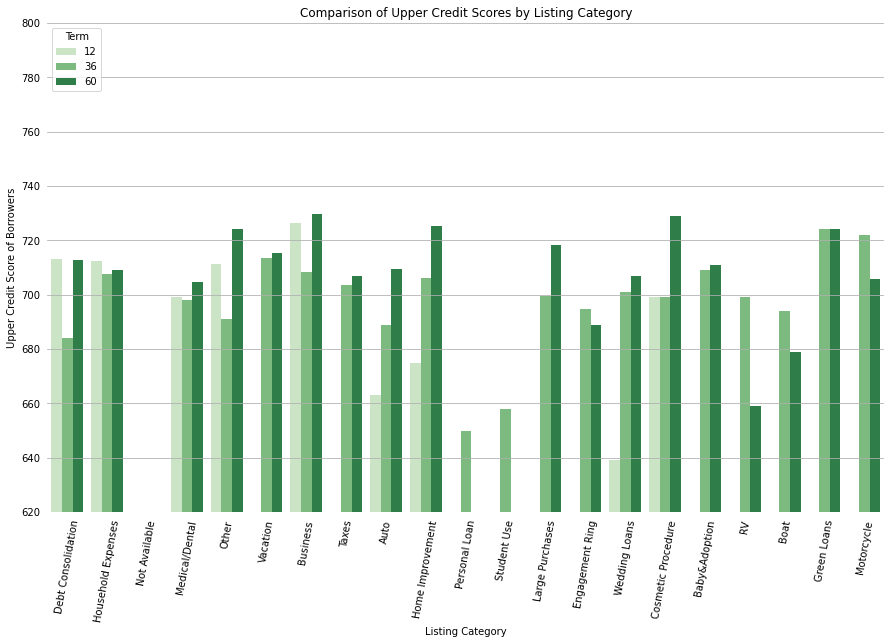

In [72]:
#  I would like to look at the bad loans by listing category and see how it works with the upper credit scores
fig, ax = plt.subplots(figsize = (15,9))

sns.barplot(data = bad_loans, x = 'ListingCategory', y = 'CreditScoreRangeUpper', hue = 'Term', palette = 'Greens', ci =None)

plt.xlabel('Listing Category')
plt.ylabel('Upper Credit Score of Borrowers')
plt.title('Comparison of Upper Credit Scores by Listing Category')
plt.tick_params(left = False, bottom = False)
plt.grid(b = True, axis = 'y')
plt.xticks(rotation = 80)
plt.ylim(620, 800)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#### <font color = 'teal'>Observation(s):
    
> It appears that despite the higher APR of loans given to borrowers who wish to undergo cosmetic proceedures, they have the highest credit ratings of the professions, alongside those who need green loans and businesses.

#### <font color = 'teal'>5. Relationship between Occupation, APR and Loan Term</font>

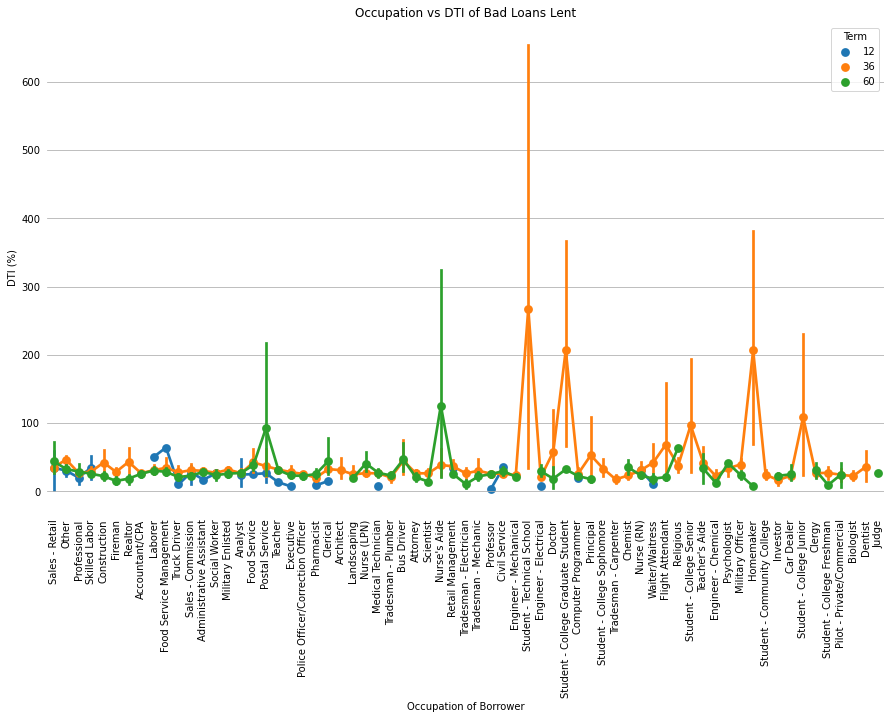

In [73]:
# I would like to look at the bad loans further: What was the relationship between their DTI and Occupations and loan term?

fig, ax = plt.subplots(figsize = (15, 9))

sns.pointplot(data = bad_loans, x = 'Occupation', y = 'DebtToIncomeRatio (percentage)', hue = 'Term')

plt.xlabel('Occupation of Borrower')
plt.ylabel('DTI (%)')
plt.title('Occupation vs DTI of Bad Loans Lent')
plt.tick_params(left = False, bottom = False)
plt.grid(b = True, axis = 'y')
plt.xticks(rotation = 90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

##### <font color = 'teal'>Observation:

> Certain borrowers appear to be in debt of loans. The notably indebted ones are students of technical schools, college graduate students and  homemakers, despite loan terms of 36 months. One would be cautious of giving loans to students and homemakers as the bulk of their income goes into servicing loans.

#### <font color = 'teal'>6. Stated monthly income, original loan amount and the relationship with the debt to income ratio</font>
***
##### What is the relationship between these 3 loan factors?

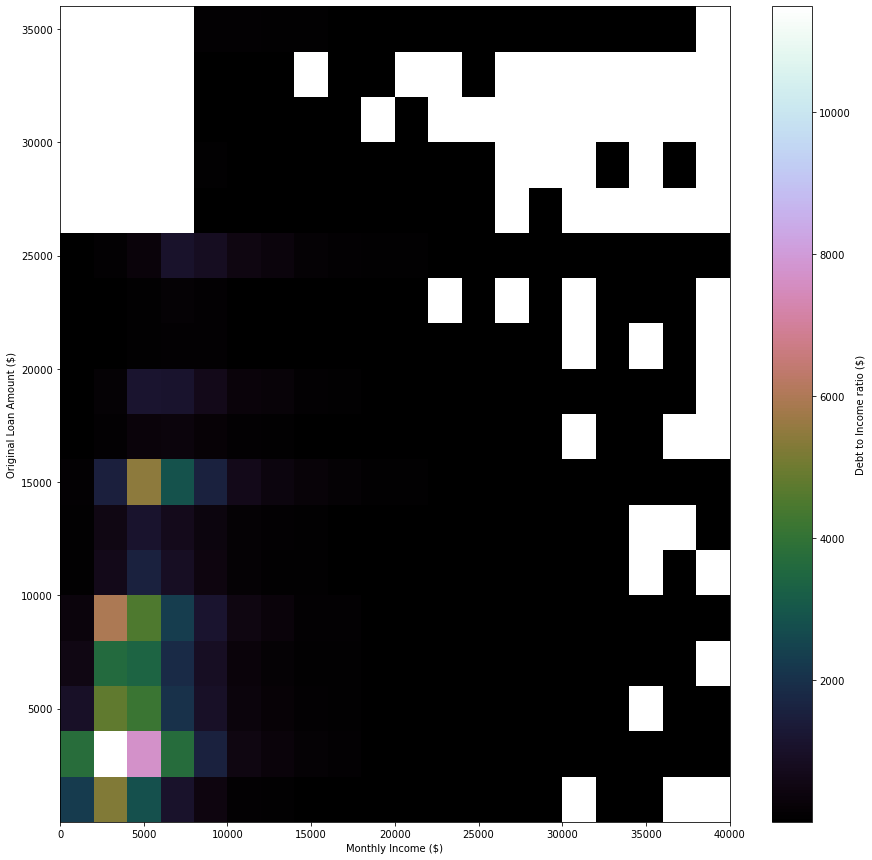

In [74]:
plt.figure(figsize = (15, 15))

bins_x = np.arange(1, loan['StatedMonthlyIncome'].max()+2000, 2000)
bins_y = np.arange(1, loan['LoanOriginalAmount'].max()+2000, 2000)
plt.hist2d(data = loan, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', cmin = .5, cmap = 'cubehelix',
           bins = (bins_x, bins_y))
cbar = plt.colorbar(label = 'DebtToIncomeRatio (percentage)')
cbar.set_label('Debt to Income ratio ($)')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Original Loan Amount ($)')
plt.xlim(0, 40000);

##### <font color = 'teal'>Observation(s):
    
> Majority of the debt to income ratio is well below 50%. The highest DTI occurs with some of the lowest monthly income and the lowest loaned amounts.

#### <font color = 'teal'>7. Stated monthly income, Original loan amount and the realtionship with the borrower annual percentage rate</font>
***
##### What could the relationship between these 3 loan factors be?

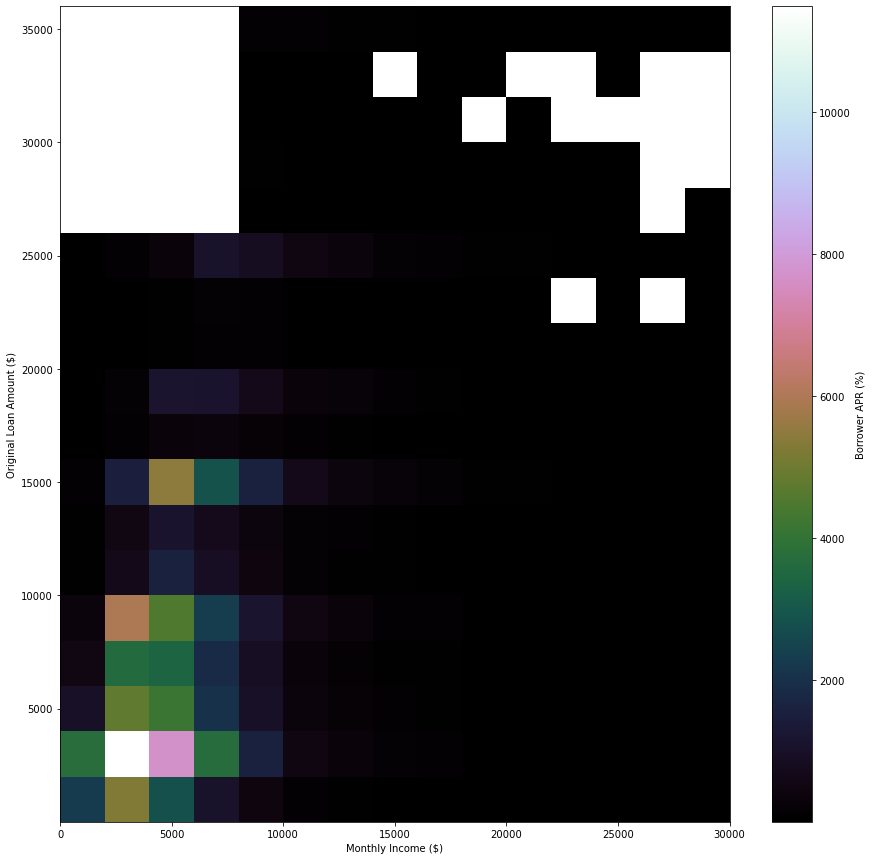

In [75]:
plt.figure(figsize = (15, 15))

bins_x = np.arange(1, loan['StatedMonthlyIncome'].max()+2000, 2000)
bins_y = np.arange(1, loan['LoanOriginalAmount'].max()+2000, 2000)
plt.hist2d(data = loan, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', cmin = .5, cmap = 'cubehelix',
           bins = (bins_x, bins_y))
cbar = plt.colorbar(label = 'BorrowerAPR (percentage)')
cbar.set_label('Borrower APR (%)')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Original Loan Amount ($)')
plt.xlim(0, 30000);

##### <font color = 'teal'>Observation(s):

> The same observation with the DTI can be observed here. Borrowers with less income are likely to take a loan with a higher Annual percentage rate whilst having high debt to income ratios. 

### <font color = 'teal'>Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The credit score rating actually determined the term of a loan, it equally affected the loan amount. There were some borrowers with low earnings who still managed to keeep a good credit score and so they had access to larger loans. Those who had higher incomes tended to loan less money and were given the shortest terms, while those who had lesser incomes tended to go for bigger loans and were given enough time to pay back the loans. However, many were indebted in one way or the other, up to 50% indebtedness in some cases.
>
>I knew the loan term was a factor in loaned amount, but did not know that income also determined the loan term apart from the amount loaned. The higher the income, the less the payback period.

### <font color = 'teal'>Were there any interesting or surprising interactions between features?

> Features did not behave as I expected them to, but for the most part they truly did follow the correlation plot and did not deviate too much from that. Although, I expected people who went for cosmetic surgery to be less prudent with spending, however, they had th elowest debt to income ratio and the highest credit scores. 
>    
>People who need loans to get a move on in life tend to be more likely to be delinquent and need larger loans. They were indebted from previous unpaid due payments, and will likely spend time paying off loans that are past their due date. This means a lot of them are actually living in debt.
>
>I was equally suprised that people would take out a loan to pay another loan, and the loan company was not cautious of that fact. Or taking loans to pay taxes.